In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
def show_bins(data):
    bins = np.arange(data.min(), data.max() + 1, 1)
    plt.hist(data[0, :], bins=bins)
    plt.show()


In [4]:
def show_bins_1d(data):
    bins = np.arange(data.min(), data.max() + 1, 1)
    plt.hist(data, bins=bins)
    plt.show()

In [5]:
def reduce(bins, resized):
    for i in range(len(bins)):
        bins[i] += (resized == i).sum()
    return bins

In [6]:
def RGB2LUMA(rgb_array):
    return 0.2126*rgb_array[0] + 0.7152*rgb_array[1] + 0.0722*rgb_array[2]

In [7]:
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv.LUT(src, table)

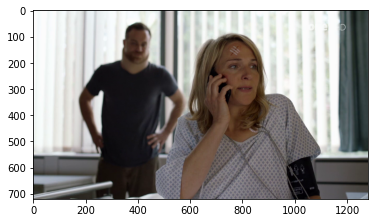

In [8]:
#Just grabbing a frame

width = 1280
height = 720
cap = cv.VideoCapture('video.ts')

i = 0
eb52_count = 0
bins = np.zeros(256, dtype = int)

while cap.isOpened() and i < 1:
    i+=1
    ret, frame = cap.read()
    if ret:
        # drop all but the first component of YCR_CB colorspace to only keep luma
        first_row_luma = cv.cvtColor(frame, cv.COLOR_BGR2YCR_CB)[0, :, 0][None]
        # 30 bytes of data
        resized = cv.resize(first_row_luma, (30 * 8, 1), interpolation=cv.INTER_LINEAR)
        bins = reduce(bins, resized)

        resized_back_orig = cv.resize(resized, (width, 1), interpolation=cv.INTER_NEAREST)

        # plt.rcParams["figure.figsize"] = (30,5)
        # np.set_printoptions(threshold=np.inf)
        # print(first_row_luma)
        # show_bins(first_row_luma)
        
        # print(resized)
        # show_bins(resized)

        # imshow_luma = np.repeat(first_row_luma, height, axis=0)
        # imshow_resized_back_luma = np.repeat(resized_back_orig, height, axis=0)
        
        plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))

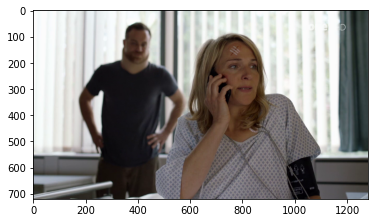

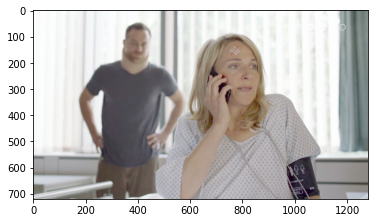

In [9]:
frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
plt.imshow(frame)
plt.show()
gamma_corrected = gammaCorrection(frame, 2.2)
plt.imshow(gamma_corrected)
plt.show()

In [10]:
# for i, e in zip(range(len(frame[:1][0])),(frame[:1][0])) :
#    print(round(RGB2LUMA(e)))
# print(frame[:1][None])
result = [round(RGB2LUMA(e)) for e in frame[:1][0]]
print(len(result))
result = np.array([result])
print((result))
print((first_row_luma))
resized = cv.resize(first_row_luma, (30 * 8, 1), interpolation=cv.INTER_LINEAR)

1280
[[10 10 10 ... 15 15 15]]
[[10 10 10 ... 15 15 15]]


[[22 20 19 20 20 22 20 20 21 19 21 21 19 19 21 19  0  0  0  0  1 15 22 20
  21 22 14  0  0  0  0  0 17 18 19 18 21 18 18 21 21 23 12  1  1  1  1  1
  20 20 20 20 22  8  0  0  0  0  5 21 21 19 18 18  1  0  0  1  0  0  1  1
   1  0  6 19 20 19 18 18  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1  0  0  0  0  1  1  0  0  0 17 17 17 17 18 18 19 19
  21 21 21 21 21 21 21 21  1  0  1  0  0  1  0  1  0  0  0  0  0  0  0  0
  20 20 22 22 22 22 22 22 22 18 13  1  1  2  1  2 19 20 20 19 22  6  1  0
   2  0  4 22 18 17 18 18 19 30 29 30 25 14  8 10  8  9  8 21 18 21 18 18
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  1  0  6 22 29
  31 23 10  2  1  0  0  0  0  0  0  0  0 10 21 16 19 19 17 24 31 29 29 31
   4  4  5  4  7  3  3  4  2  2  0 16 26 28 27 24  4  9  6  4 11  4  3  3
   2  4  5 17 20 22 19 22  2 13  5  9  6 11  4  3  6  4  8 13 19 19 20 18
   0 10  8  7  7 11  4  5 10  5  6 29 32 33 32 31  6  6  6  6 10 17 31 30
  37 32 16  5  9  9  9  6 11 12 11 11 

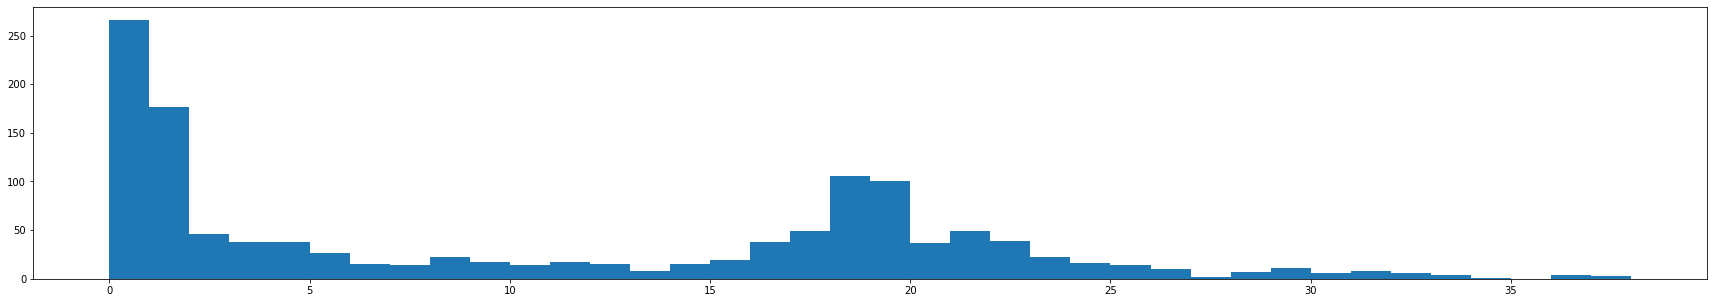

[[19 21 19  0 21  0 19 21  1 20  0 19  0  1 19  0  1  0  0  0  0 17 20 21
   1  1  0 22 22  2 20  1 17 29  9 21  0  0  0  1 30  0  0 18 29  5  3 28
   6  3 22  6  5 19  8  8 33  6 34  9 11  7  5 20  1 29  7  1 31 28 34 36
   8 31  8  8 28  1 25  5 16 16  1 16 17 16  0 17  0  0 16  1 16  1 16  0
   0 17  1  0  1  1 17 18 16  0  1 24  0 18  1 19  1 25  0  2 18 18  2 23
   0 18  0 22 19 18 20 17 17  0 20 17  1  1  1  2  2 18  1  1  0 23 22  0
   0 19  0  0  1  0 24  0 25  0  2 23 18  1 17  0  1 17  1  1 18 19 18  0
  19  0  1 18 19  1  0  1 18  1 19 19  0  0  1  1 19  1  0 21  1  1 19 20
   1  0 19 18  1 17 18 22 19 19 20 21 21 20  1  1 15 18 16  2 14  3 25 19
  24  5 25  7  1  1  4  4  8  7 21  0 23 24 19  1 24 19  7  6  0  3 21  0]]


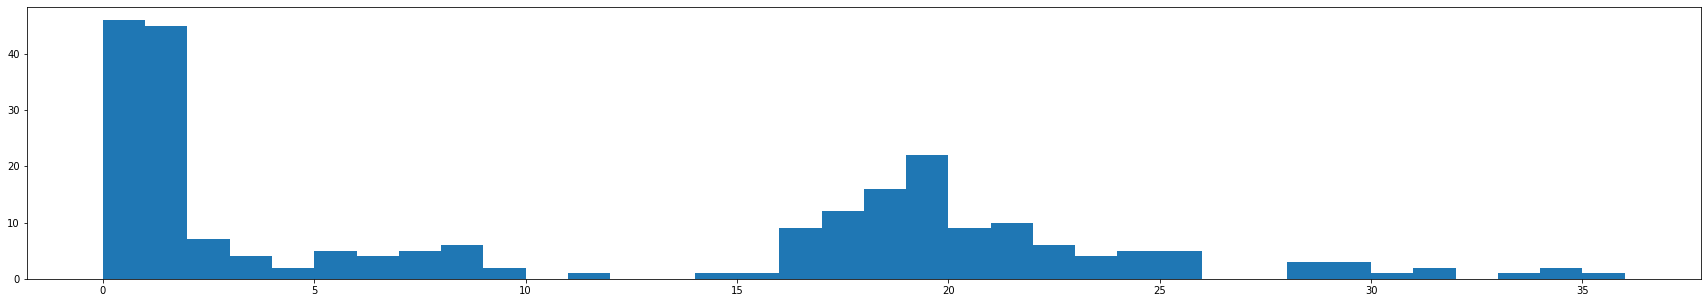

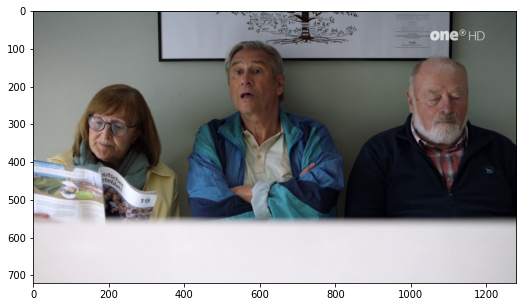

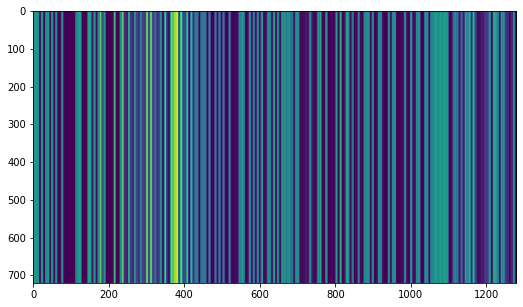

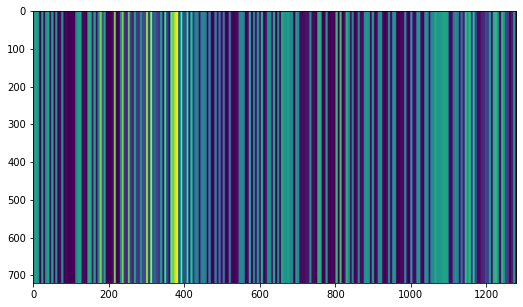

In [11]:
#old method serves as benchmark

width = 1280
height = 720
cap = cv.VideoCapture('video.ts')

i = 0
eb52_count = 0
bins = np.zeros(256, dtype = int)
while cap.isOpened() and i < 100: #1350:
    i+=1
    ret, frame = cap.read()
    if ret:
        # drop all but the first component of YCR_CB colorspace to only keep luma
        first_row_luma = cv.cvtColor(frame, cv.COLOR_BGR2YCR_CB)[0, :, 0][None]
        # 30 bytes of data
        resized = cv.resize(first_row_luma, (30 * 8, 1), interpolation=cv.INTER_LINEAR)
        bins = reduce(bins, resized)

        if i % 100 == 0:
            resized_back_orig = cv.resize(resized, (width, 1), interpolation=cv.INTER_NEAREST)

            plt.rcParams["figure.figsize"] = (30,5)
            np.set_printoptions(threshold=np.inf)
            print(first_row_luma)
            show_bins(first_row_luma)
            
            print(resized)
            show_bins(resized)

            imshow_luma = np.repeat(first_row_luma, height, axis=0)
            imshow_resized_back_luma = np.repeat(resized_back_orig, height, axis=0)
            
            plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
            plt.show()
            
            plt.imshow(imshow_luma)
            plt.show()
            plt.imshow(imshow_resized_back_luma)
            plt.show()
            
        #threshold = resized.max() - ((resized.max() - resized.min()) / 2)
        threshold = 3
        recognized_hex_string = np.packbits(resized > threshold).tobytes().hex()
        #print(recognized_hex_string)
        if recognized_hex_string.startswith("eb52"):
            eb52_count+=1
            #print(f'eb52count: {eb52_count}, Frame number: {i}', "#" * 90)

[[44 41 39 41 41 44 41 41 43 40 43 43 40 40 43 40  0  0  0  0  4 33 44 41
  42 44 32  0  1  1  1  1 37 38 40 38 43 38 38 43 43 46 29  3  4  4  4  4
  41 41 41 41 44 21  0  0  0  0 16 43 43 40 38 38  4  0  0  4  0  0  4  4
   4  0 17 39 41 39 38 38  0  0  0  0  0  0  4  4  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  4  0  0  0  0  4  3  0  0  0 37 37 37 37 38 38 40 40
  43 43 43 43 43 43 43 43  3  0  3  0  0  3  0  3  0  0  0  0  0  0  0  0
  41 41 44 44 44 44 44 44 44 38 30  4  4  7  4  7 39 41 41 39 44 17  4  0
   7  0 14 44 38 37 38 38 40 55 54 55 48 32 22 26 22 24 22 43 38 43 38 38
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  4  4  4  0 17 44 53
  56 45 25  7  4  0  0  0  1  1  1  1  1 25 42 35 39 39 36 47 56 53 53 56
  13 13 15 13 19 10 10 13  7  7  1 35 49 52 51 47 12 22 16 12 26 12  9  9
   6 12 14 36 40 43 39 43  7 30 15 23 17 27 13 10 17 13 21 30 39 39 41 38
   0 26 22 20 20 27 14 16 25 15 17 53 57 59 57 56 17 17 17 17 25 36 56 55
  64 57 35 15 23 23 23 17 27 28 27 27 

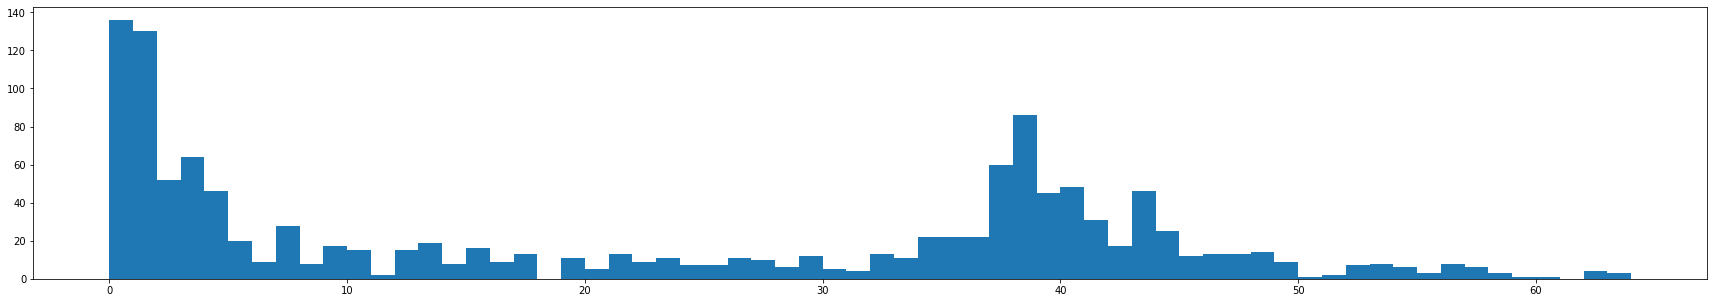

[[39 42 40  0 42  1 40 43  4 41  0 40  1  4 39  0  2  0  0  0  0 37 42 43
   3  2  0 44 44  7 41  4 37 54 24 42  0  0  0  4 55  1  1 37 53 15 10 52
  15  8 43 16 14 39 22 21 59 17 60 23 27 19 15 41  4 54 18  2 56 52 59 62
  21 55 21 21 52  2 48 16 35 34  2 34 36 35  1 36  1  1 34  1 35  2 35  1
   1 36  2  1  3  3 36 38 35  0  3 47  2 37  4 39  3 48  1  7 38 37  5 45
   0 38  1 43 39 38 40 36 37  2 41 36  2  2  4  7  5 38  3  4  0 44 44  0
   1 39  1  1  2  1 47  1 47  1  6 44 38  4 36  2  3 37  3  2 37 38 37  1
  39  1  2 37 38  3  1  2 38  3 39 39  1  1  3  3 39  3  1 42  3  3 39 41
   2  1 40 38  2 37 38 44 39 39 41 42 43 42  5  4 32 37 34  6 32  9 48 39
  47 16 48 18  3  3 12 12 22 19 42  0 46 47 40  5 47 40 19 17  1 10 42  0]]


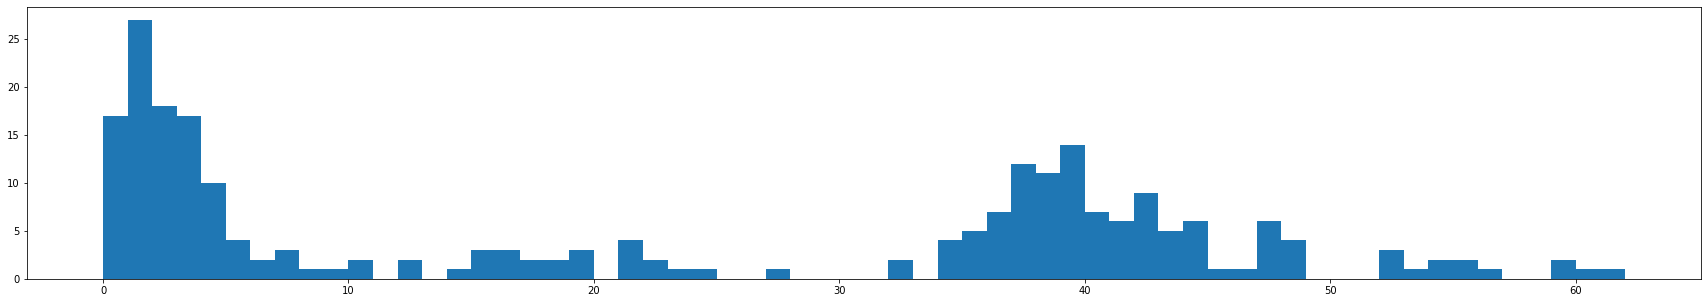

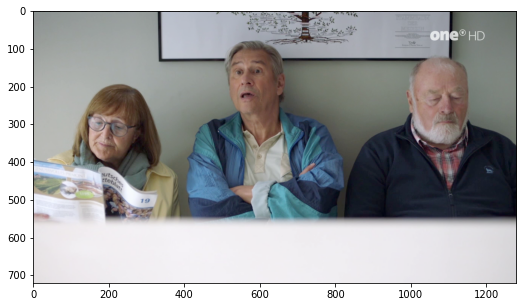

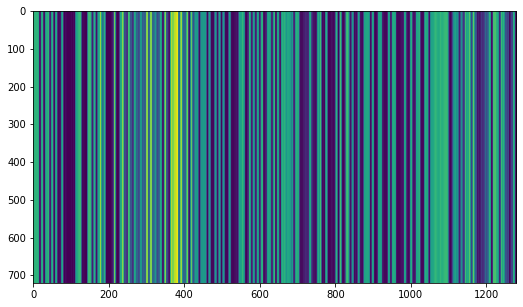

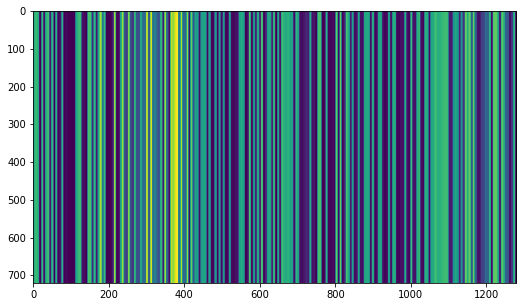

In [12]:
#playgournd for new methods

width = 1280
height = 720
cap = cv.VideoCapture('video.ts')

i = 0
eb52_count = 0
bins2 = np.zeros(256, dtype = int)
while cap.isOpened() and i < 100: #1350:
    i+=1
    ret, frame = cap.read()
    if ret:
        frame = gammaCorrection(frame, 1.4)
        # drop all but the first component of YCR_CB colorspace to only keep luma
        first_row_luma = cv.cvtColor(frame[:1], cv.COLOR_BGR2YCR_CB)[0,:,0]
        first_row_luma = np.array([first_row_luma])
        # 30 bytes of data
        resized = cv.resize(first_row_luma, (30 * 8, 1), interpolation=cv.INTER_LINEAR)
        bins2 = reduce(bins2, resized)

        if i % 100 == 0:
            resized_back_orig = cv.resize(resized, (width, 1), interpolation=cv.INTER_NEAREST)

            plt.rcParams["figure.figsize"] = (30,5)
            np.set_printoptions(threshold=np.inf)
            print(first_row_luma)
            show_bins(first_row_luma)
            
            print(resized)
            show_bins(resized)

            imshow_luma = np.repeat(first_row_luma, height, axis=0)
            imshow_resized_back_luma = np.repeat(resized_back_orig, height, axis=0)
            
            plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
            plt.show()
            
            plt.imshow(imshow_luma)
            plt.show()
            plt.imshow(imshow_resized_back_luma)
            plt.show()
            
        #threshold = resized.max() - ((resized.max() - resized.min()) / 2)
        threshold = 18
        recognized_hex_string_gamma = np.packbits(resized > threshold).tobytes().hex()
        #print(recognized_hex_string)
        if recognized_hex_string.startswith("eb52"):
            eb52_count+=1
            #print(f'eb52count: {eb52_count}, Frame number: {i}', "#" * 90)

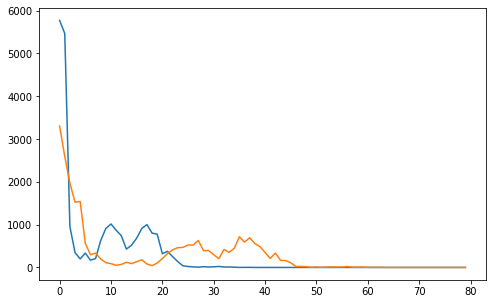

In [24]:
#print(bins)
plt.figure(figsize=(8,5))
plt.plot(bins[:80])
plt.plot(bins2[:80]) #gamma corrected
plt.show()

Finding minimum threshold candidate

In [25]:
temp = min(bins[:20])
res = [i for i,j in enumerate(bins) if j == temp]
print(res, temp)

[6] 170


In [26]:
temp = min(bins2[:30])
res = [i for i,j in enumerate(bins2) if j == temp]
print(res, temp)

[18] 42


1


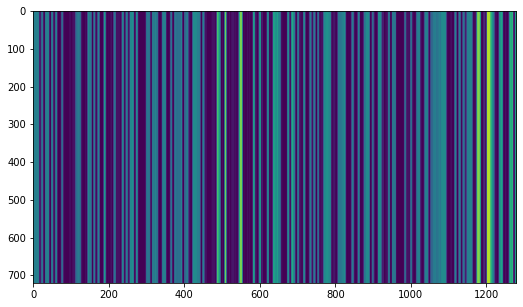

2


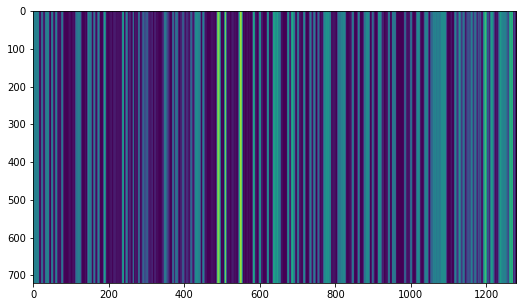

3


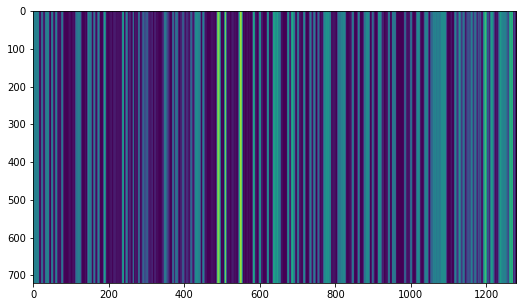

4


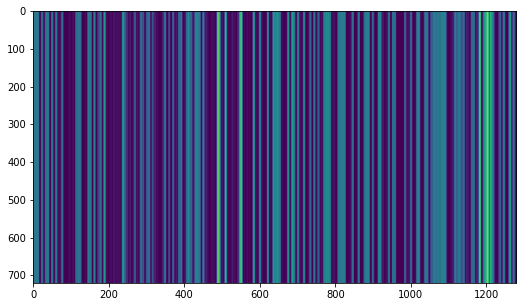

5


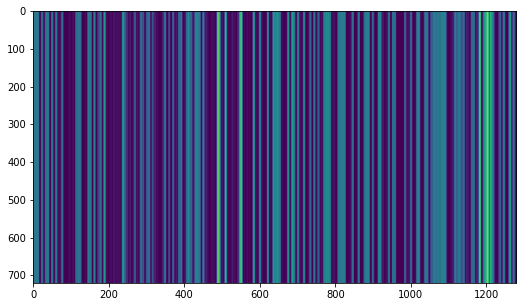

6


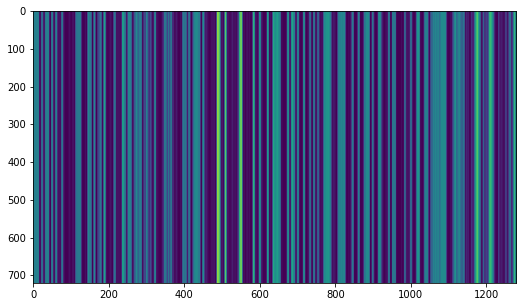

7


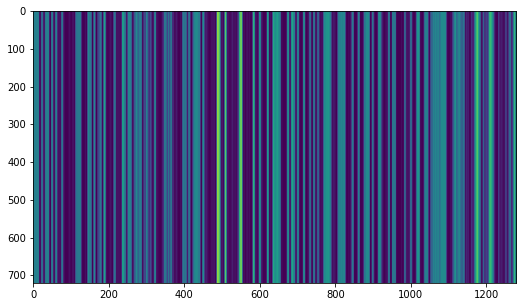

8


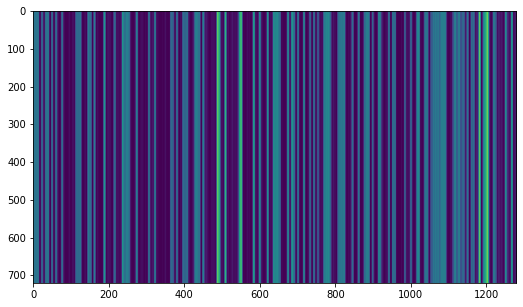

9


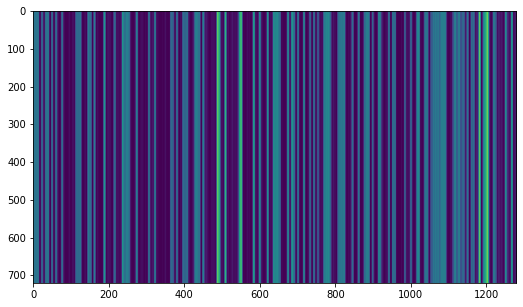

10


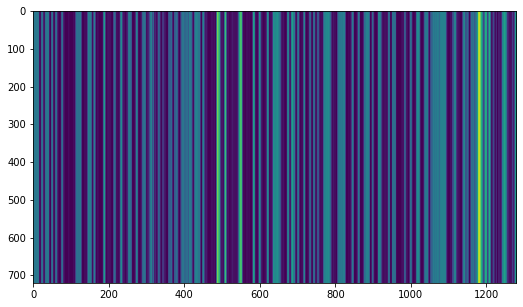

11


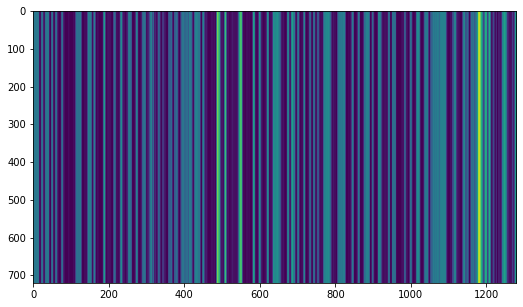

12


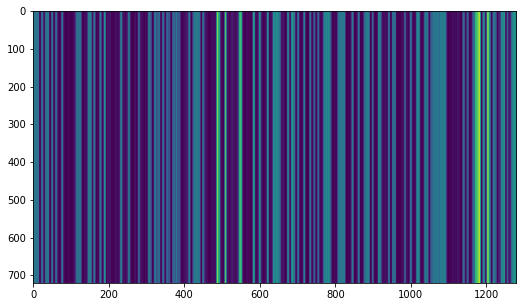

13


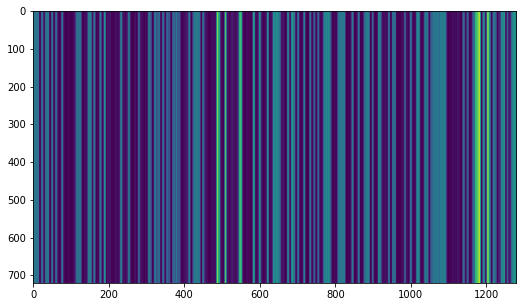

14


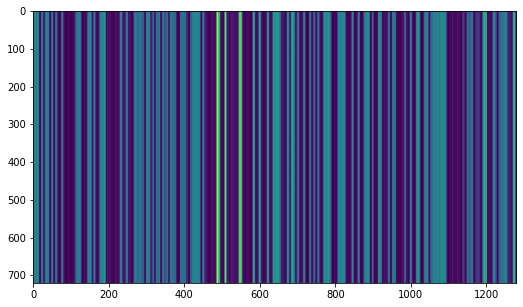

15


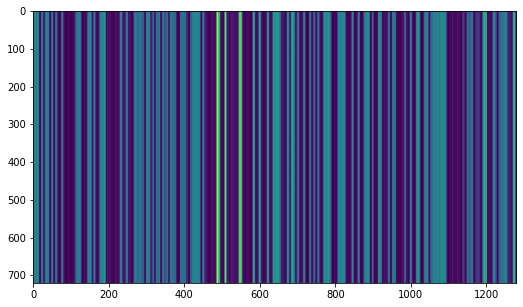

16


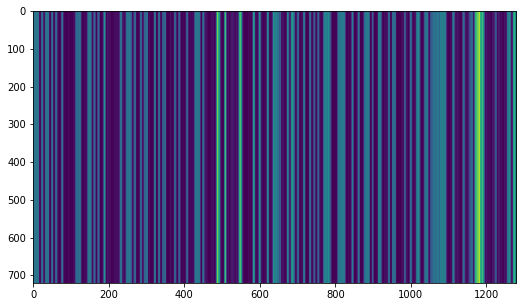

17


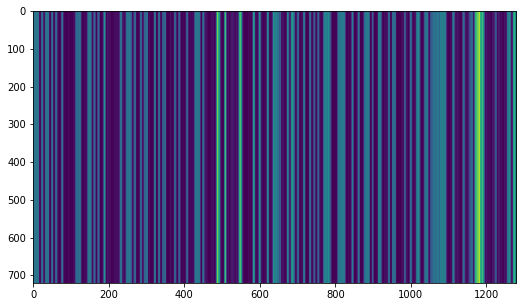

18


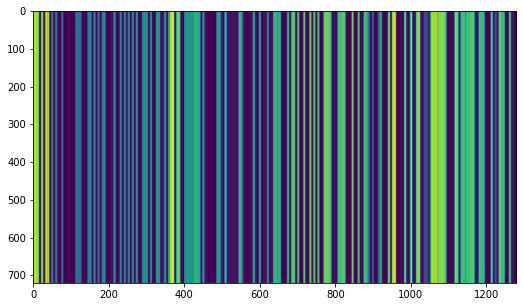

19


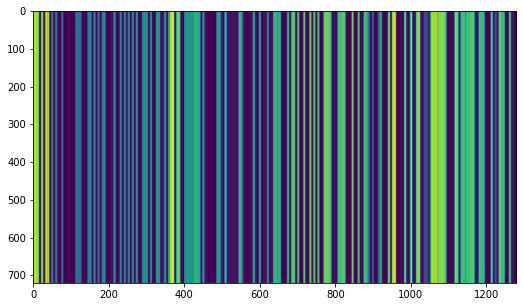

20


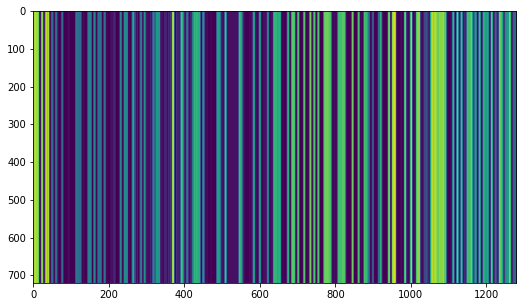

21


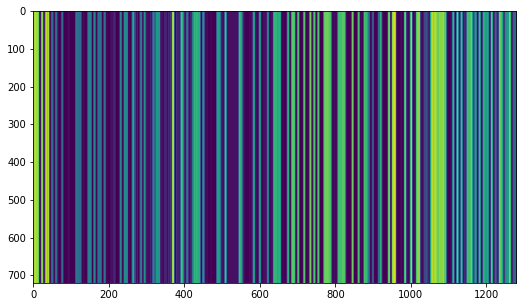

22


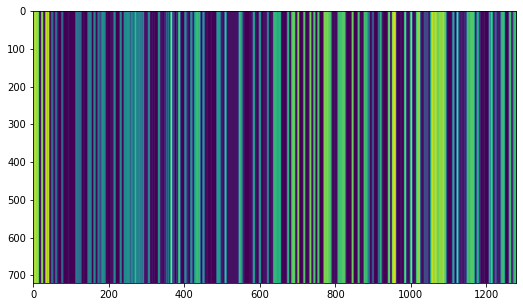

23


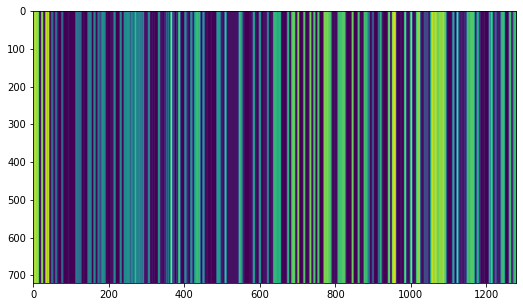

24


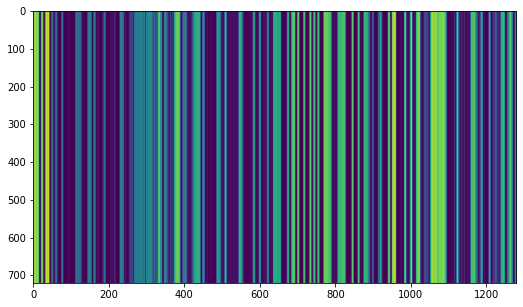

25


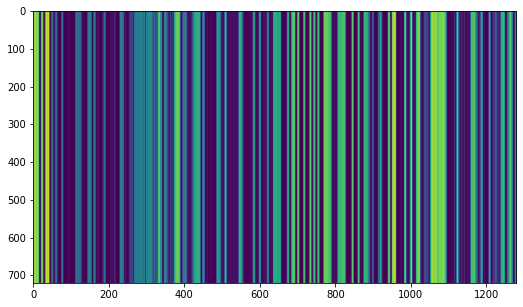

26


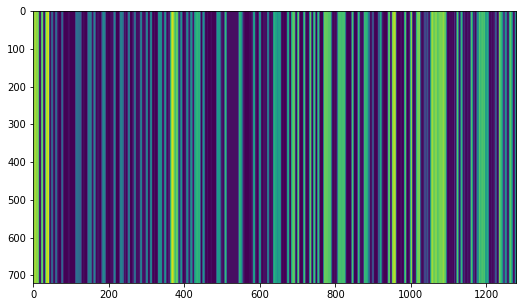

27


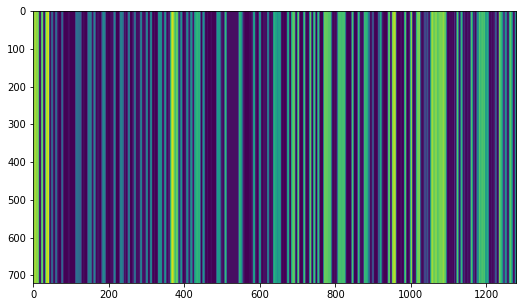

28


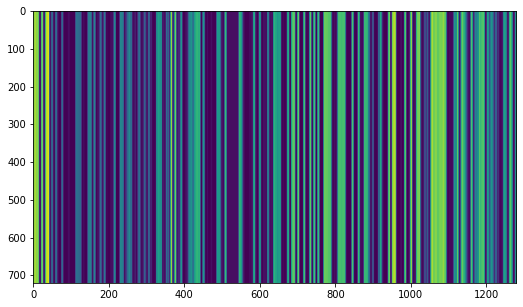

29


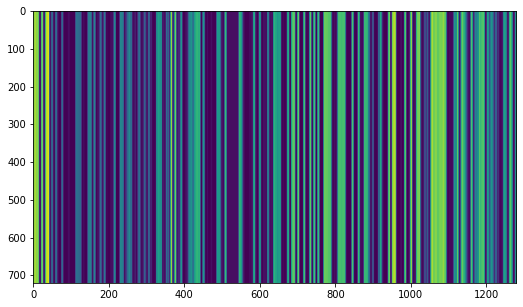

30


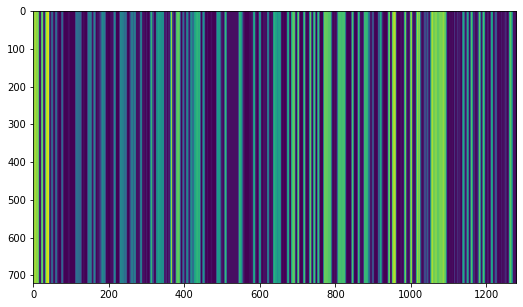

31


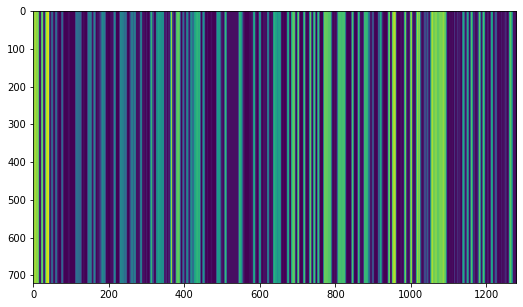

32


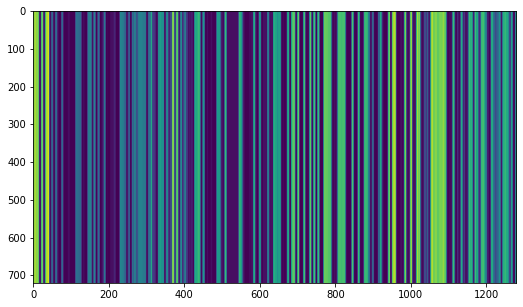

33


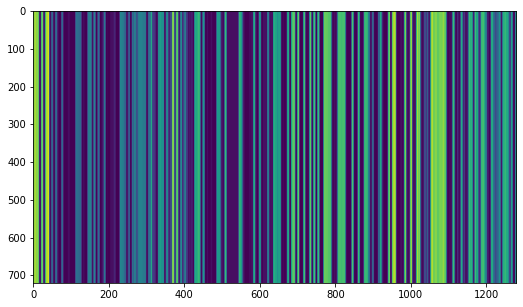

34


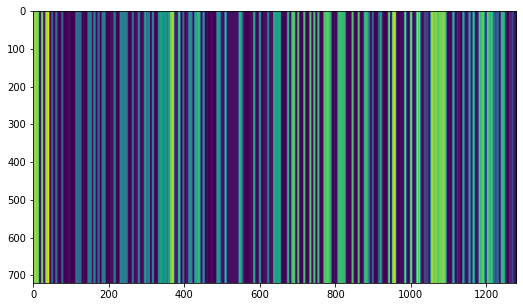

35


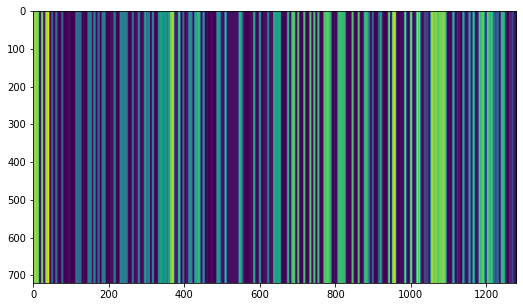

36


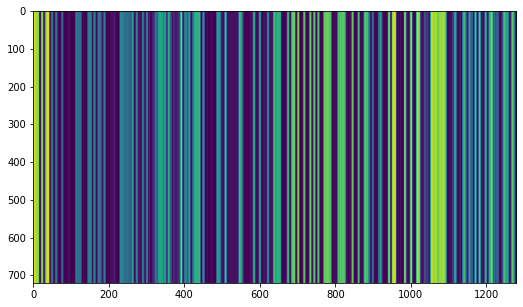

37


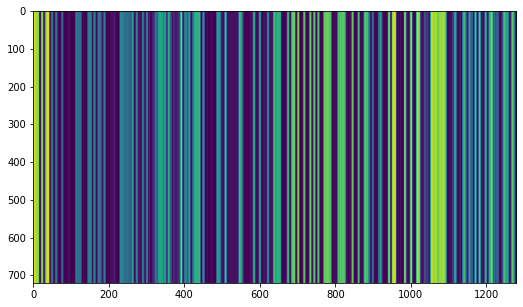

38


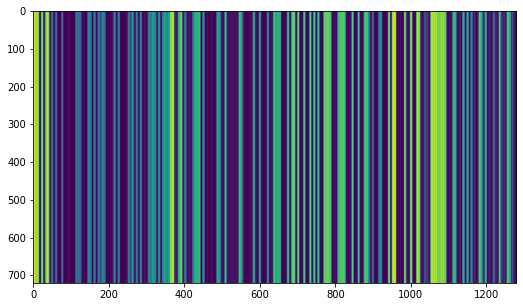

39


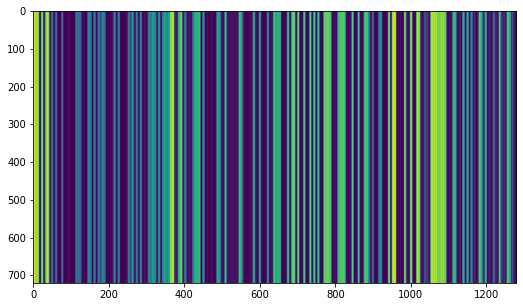

40


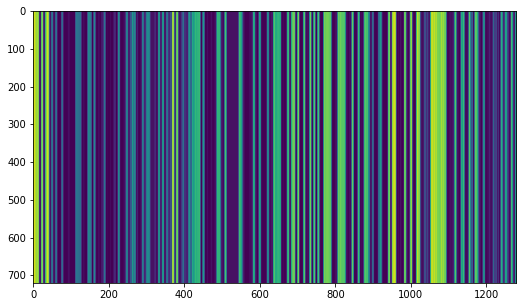

41


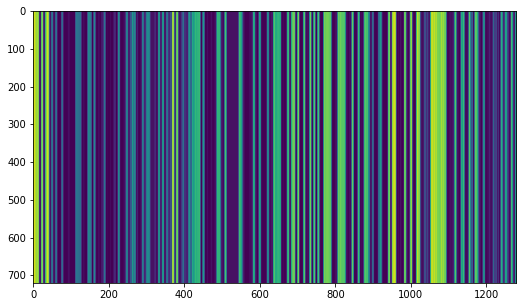

42


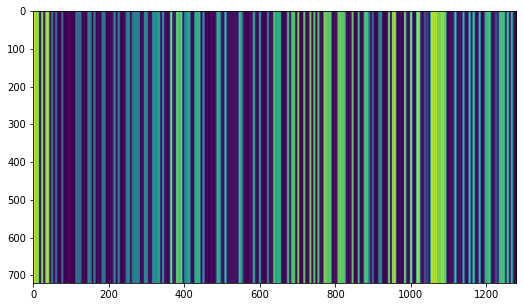

43


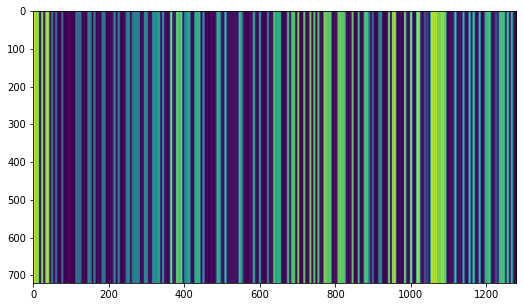

44


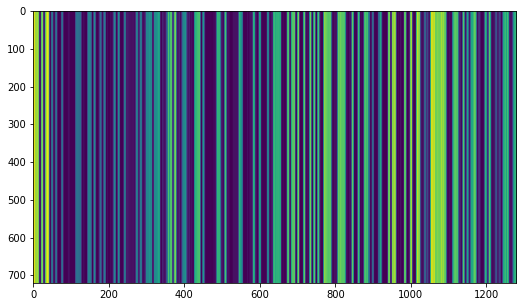

45


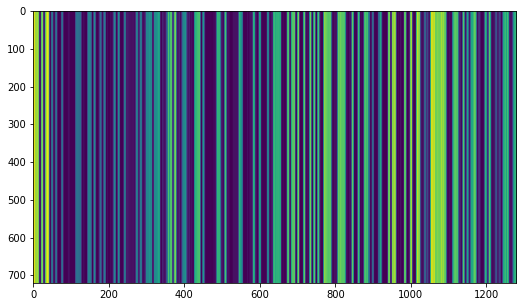

46


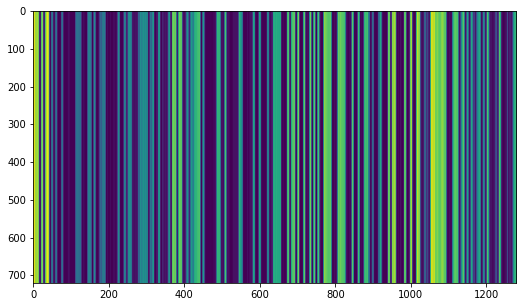

47


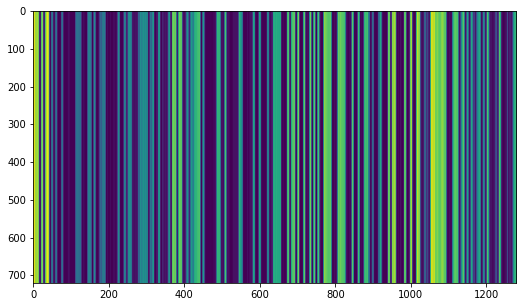

48


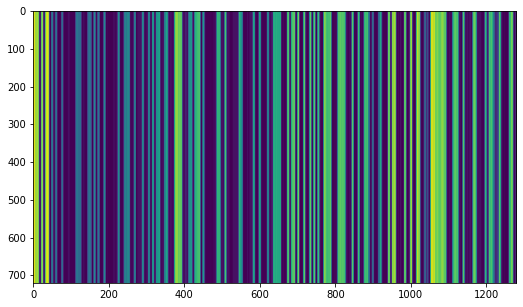

49


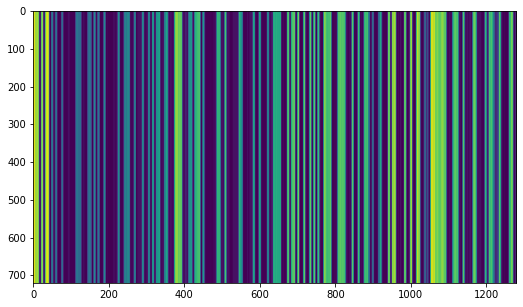

50


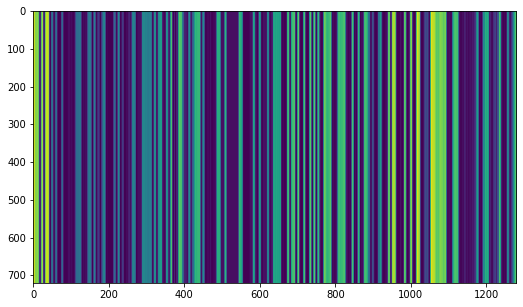

51


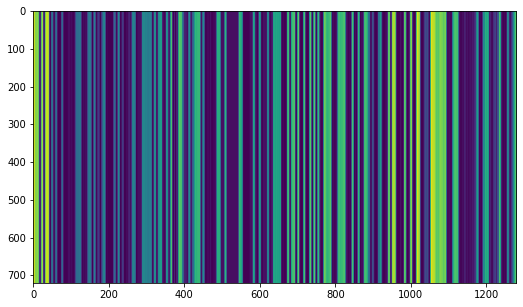

52


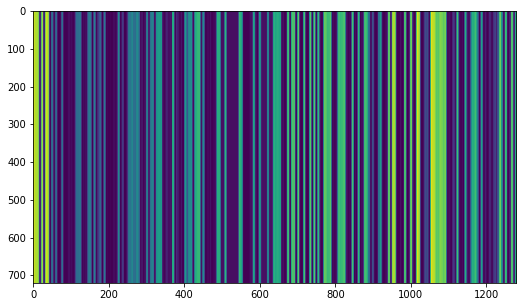

53


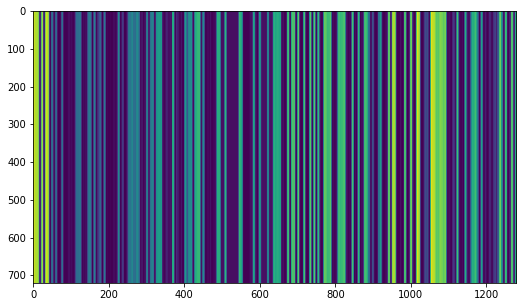

54


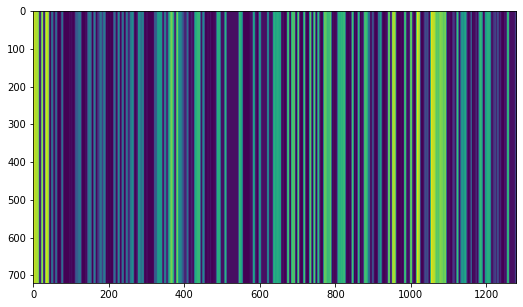

55


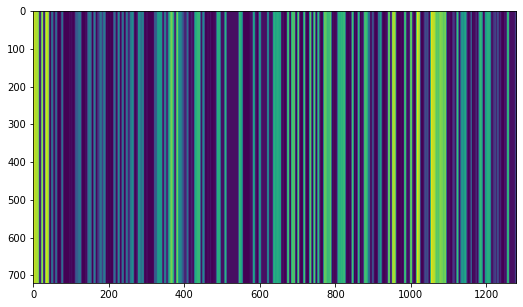

56


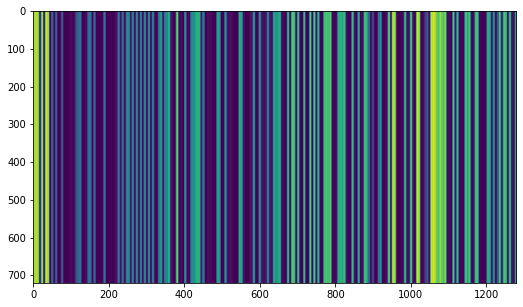

57


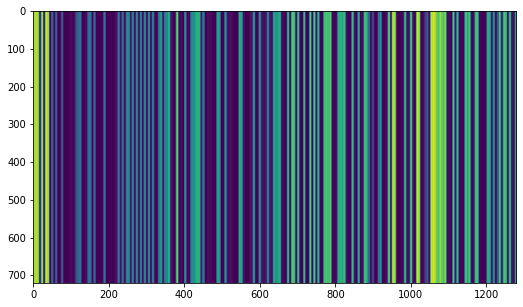

58


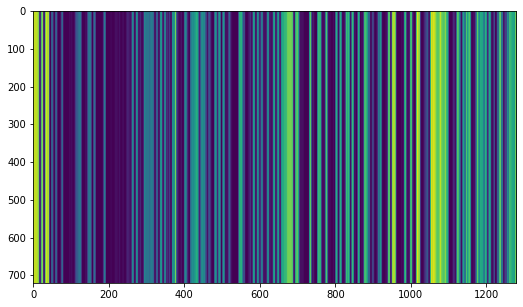

59


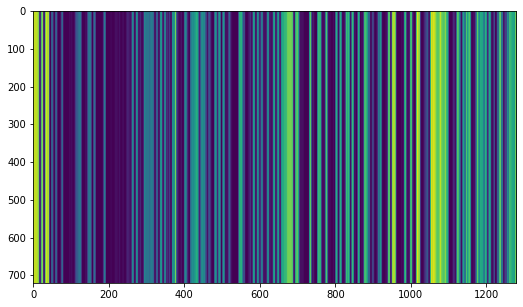

60


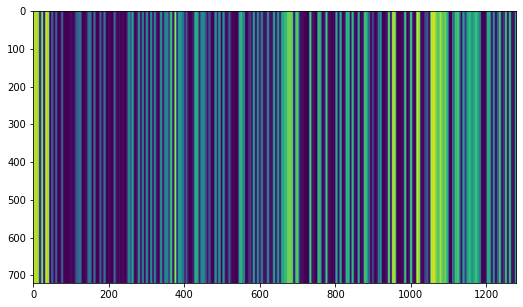

61


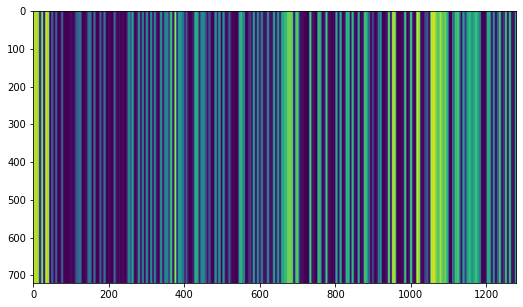

62


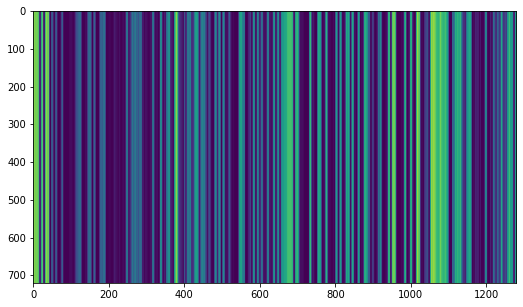

63


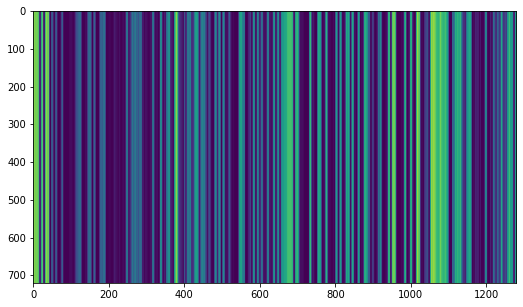

64


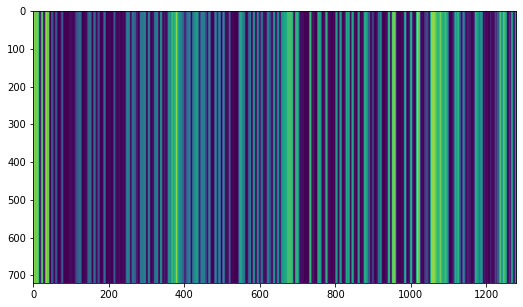

65


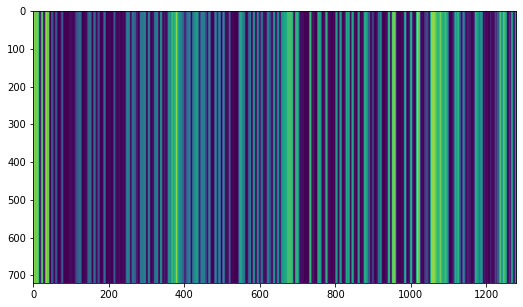

66


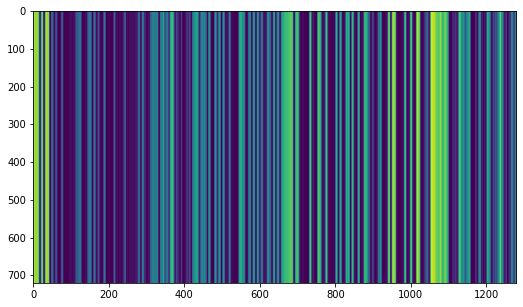

67


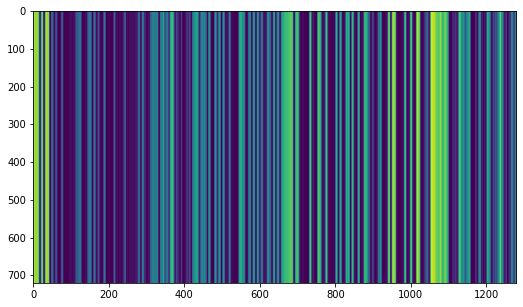

68


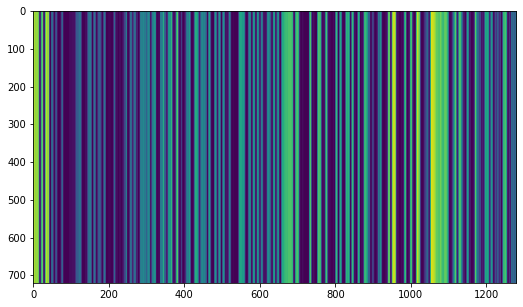

69


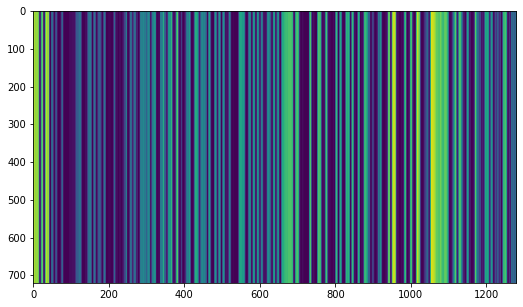

70


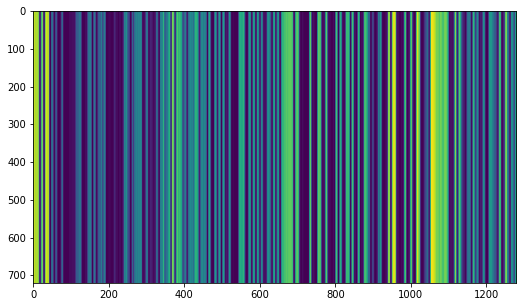

71


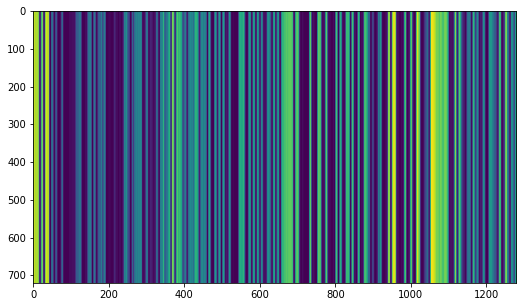

72


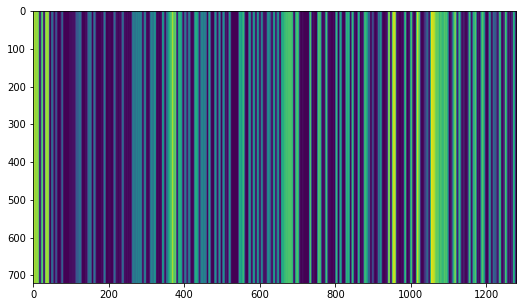

73


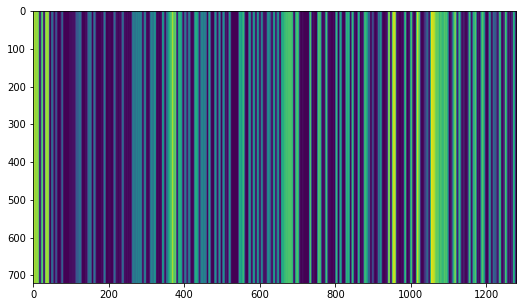

74


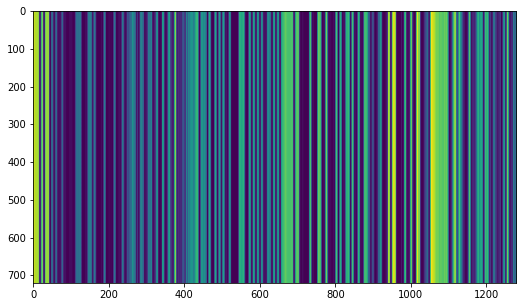

75


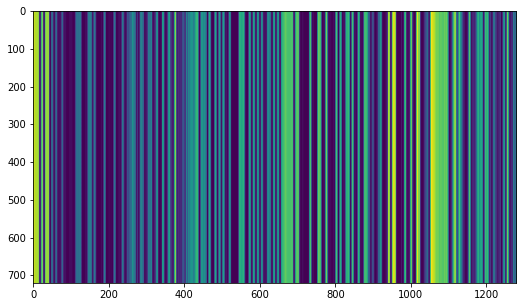

76


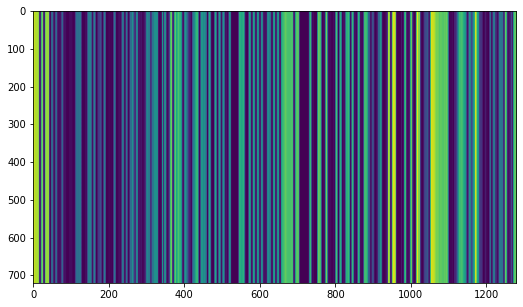

77


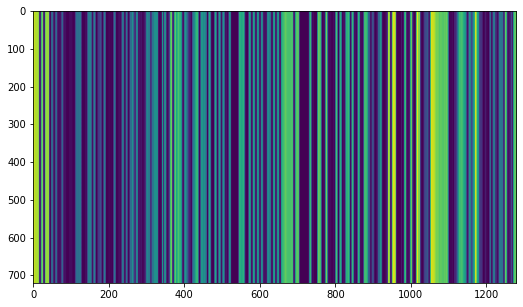

78


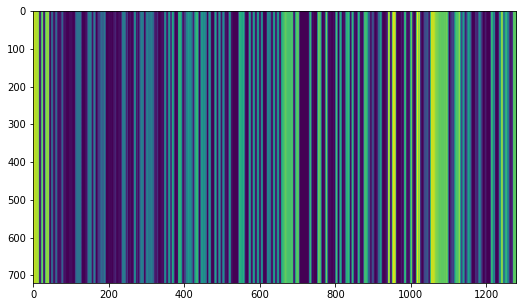

79


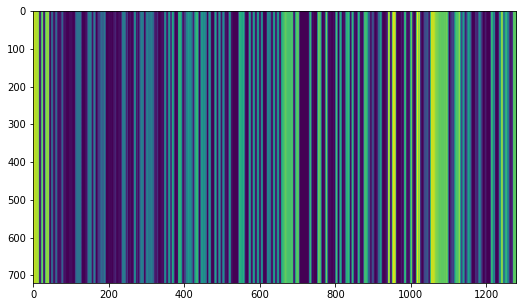

80


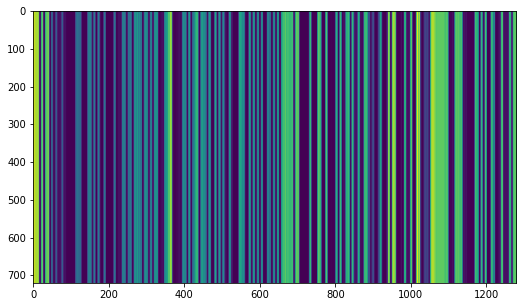

81


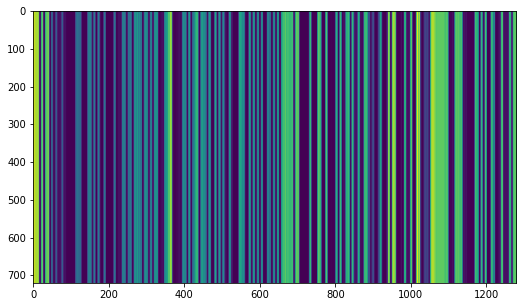

82


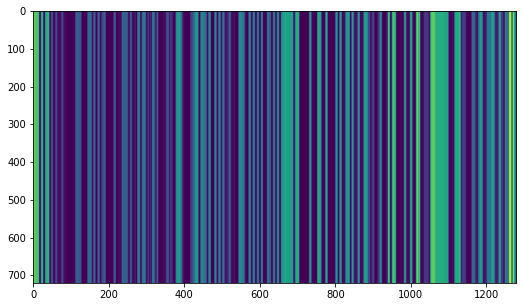

83


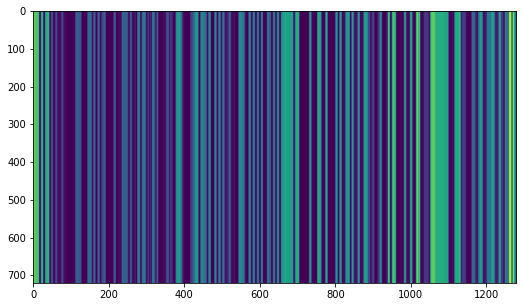

84


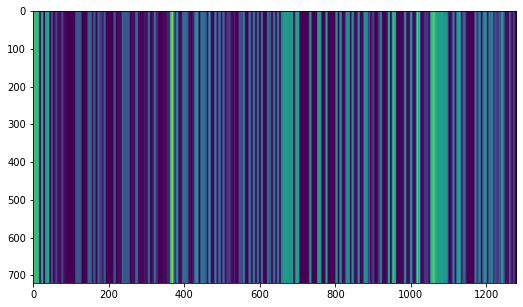

85


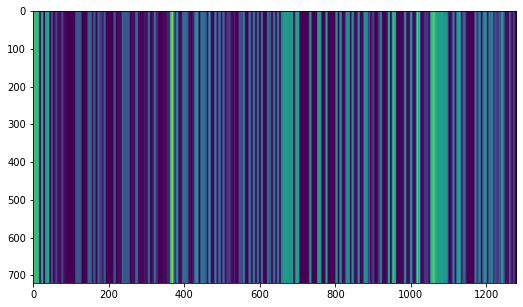

86


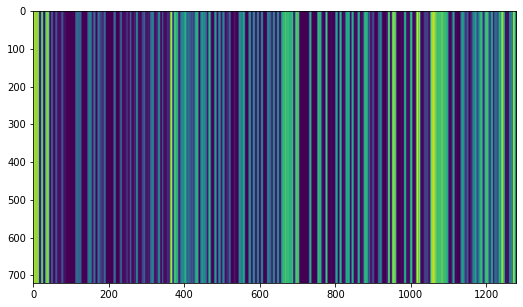

87


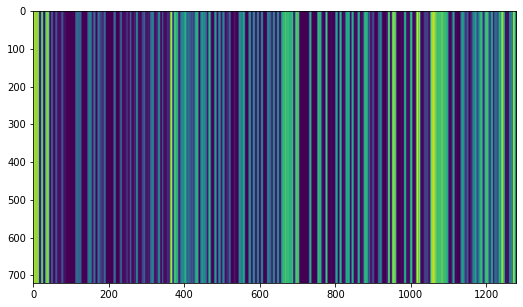

88


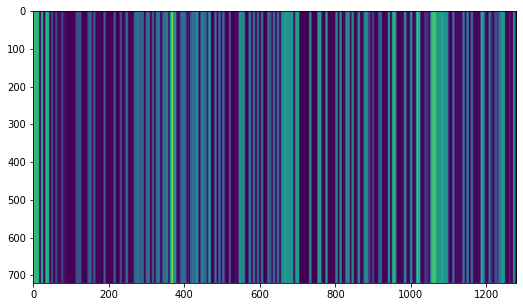

89


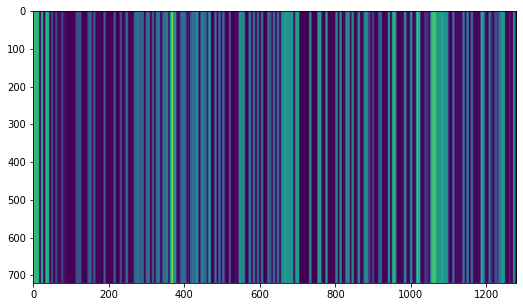

90


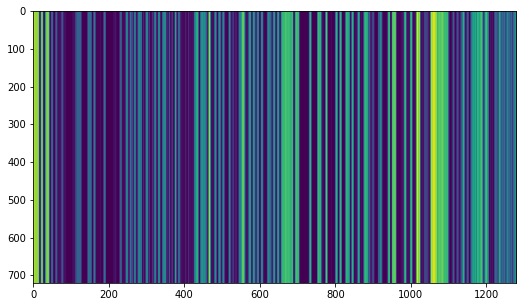

91


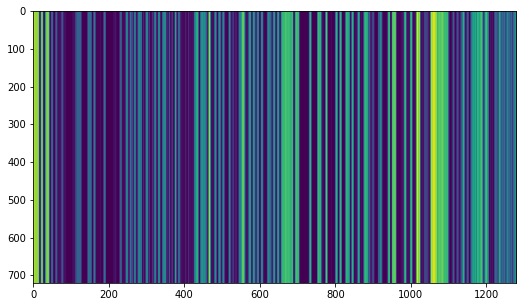

92


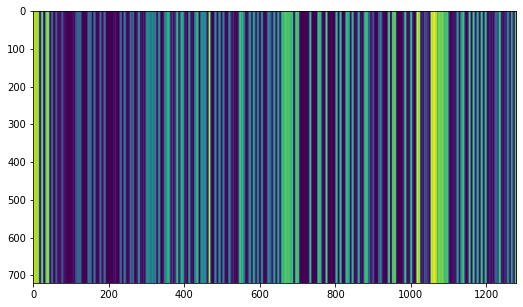

93


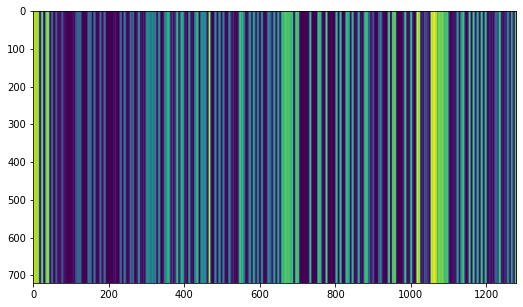

94


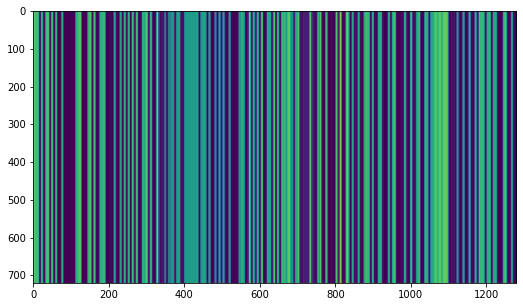

95


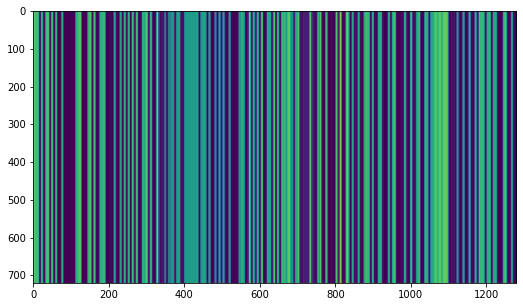

96


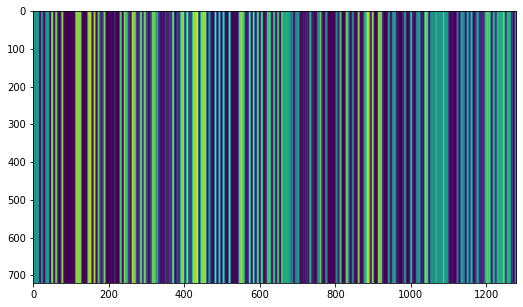

97


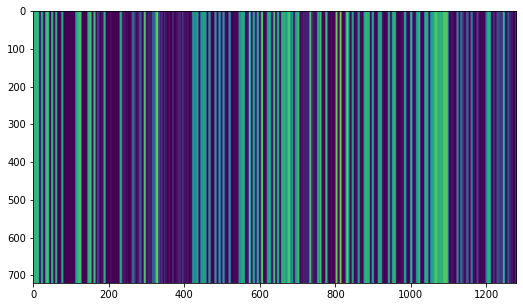

98


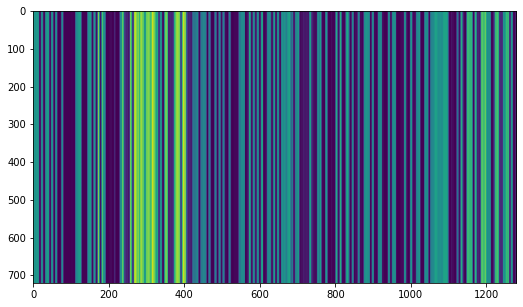

99


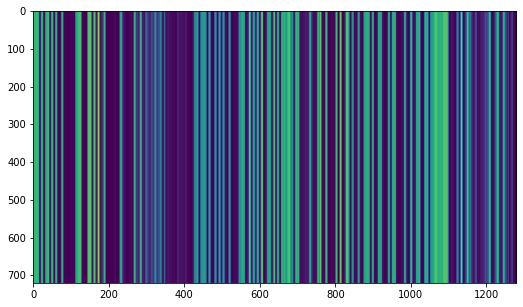

100


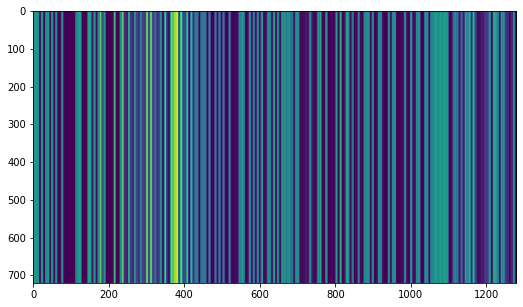

101


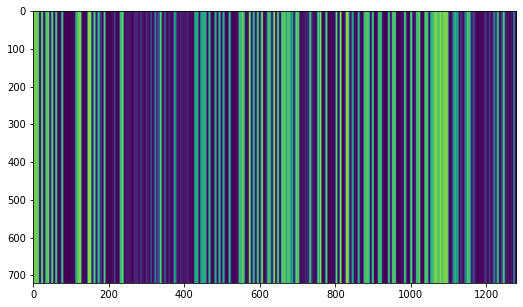

102


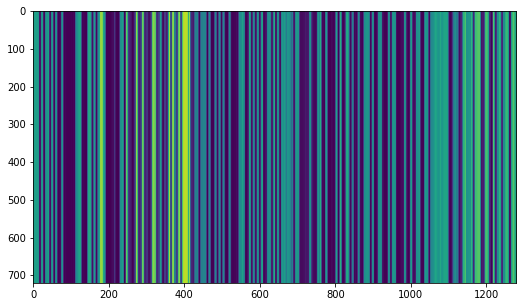

103


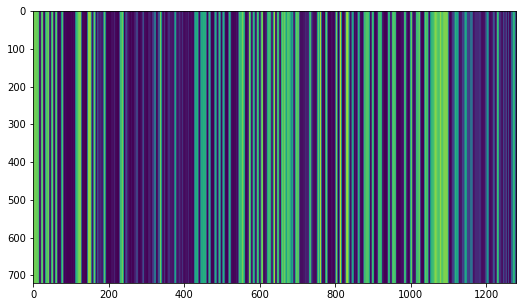

104


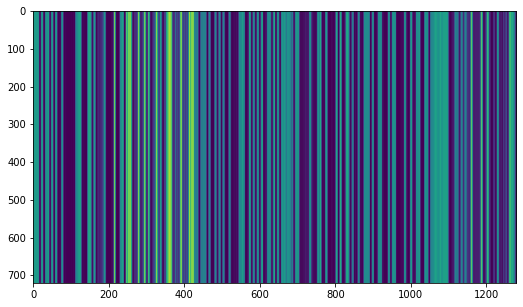

105


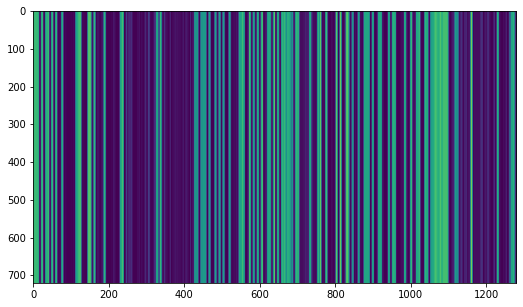

106


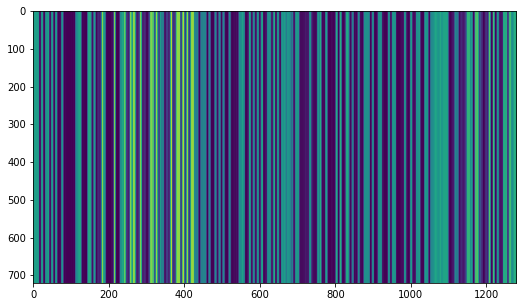

107


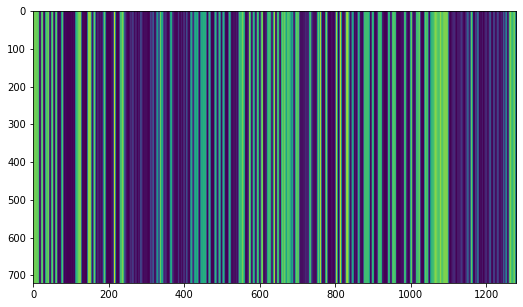

108


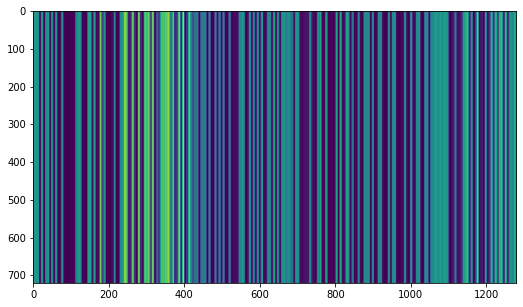

109


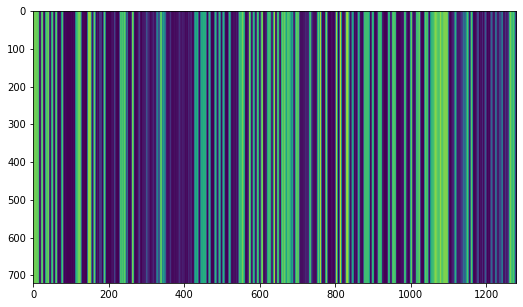

110


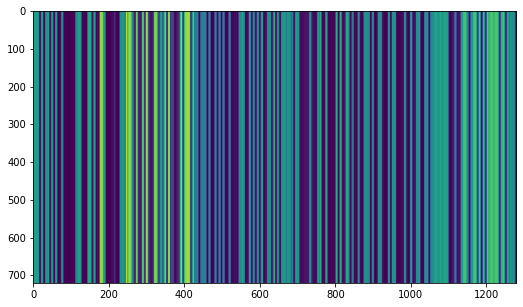

111


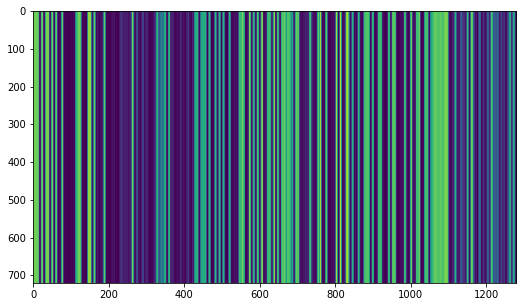

112


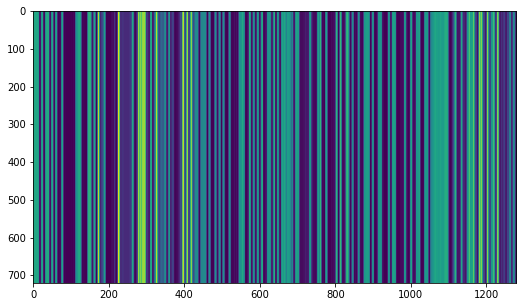

113


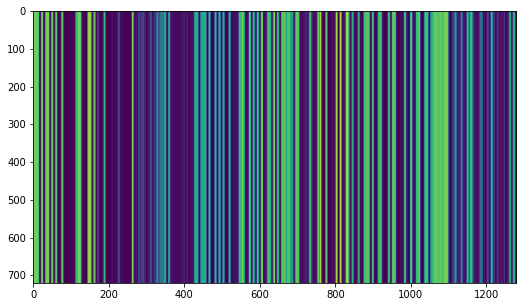

114


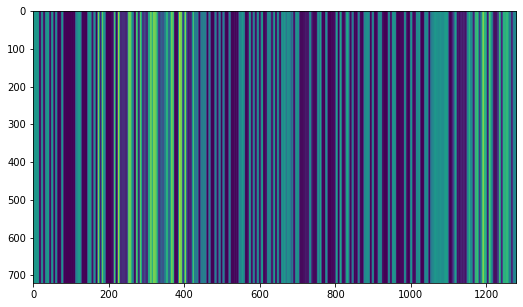

115


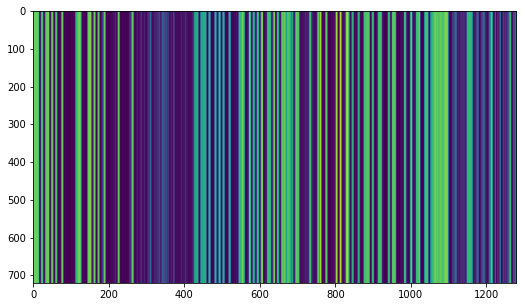

116


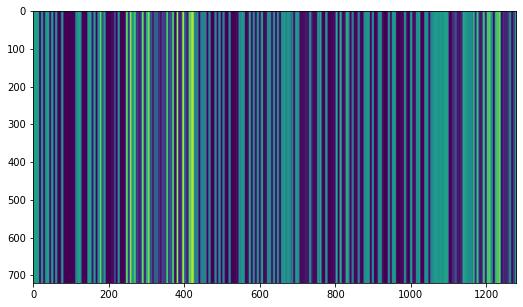

117


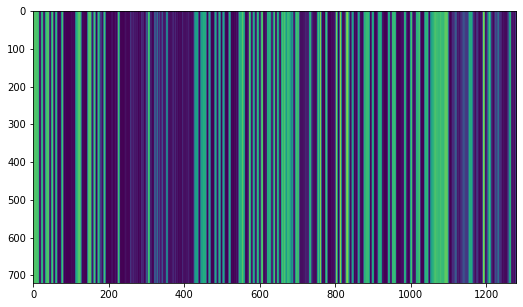

118


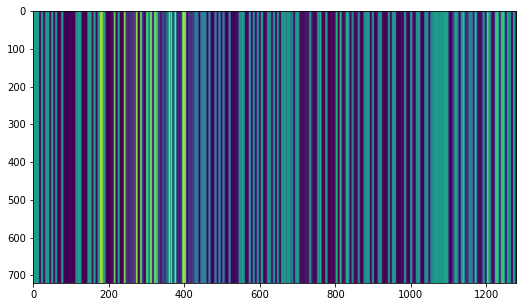

119


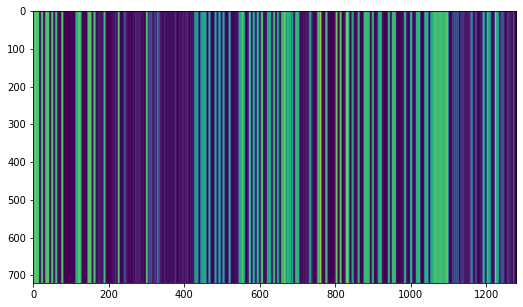

120


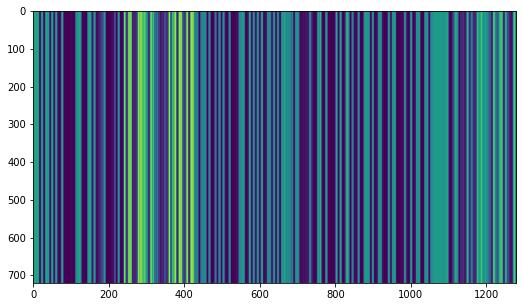

121


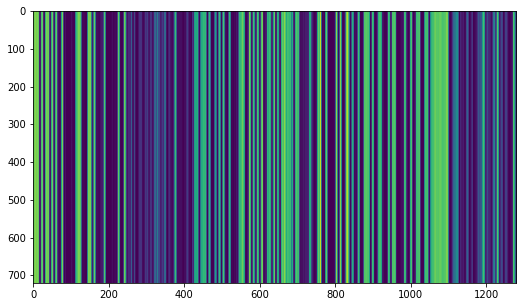

122


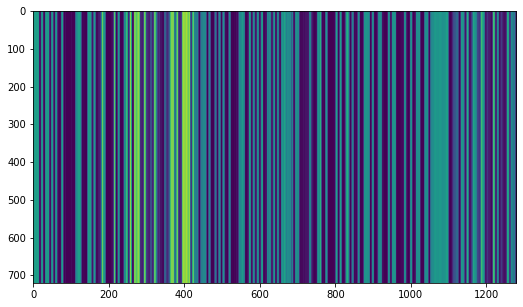

123


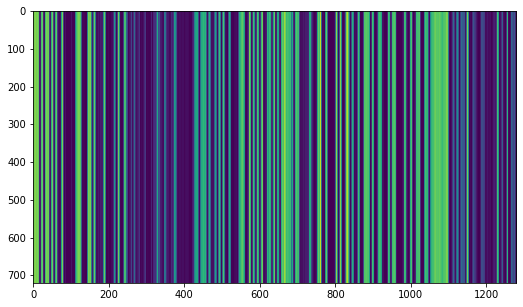

124


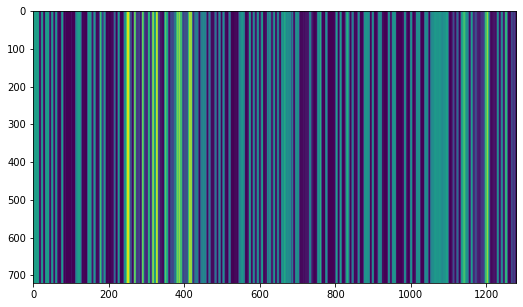

125


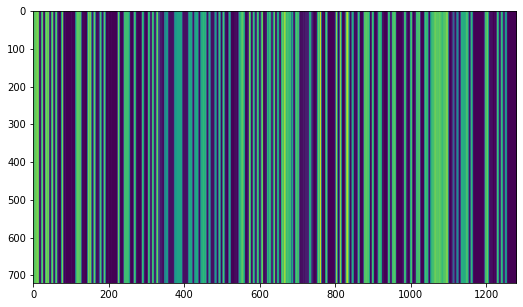

126


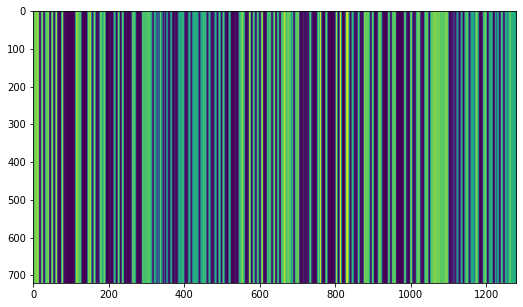

127


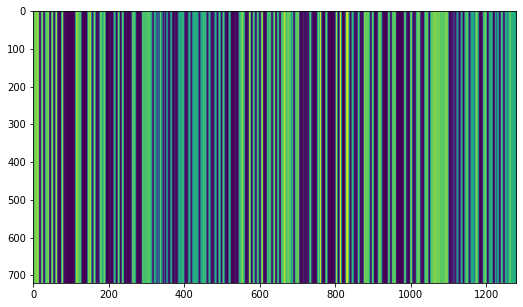

128


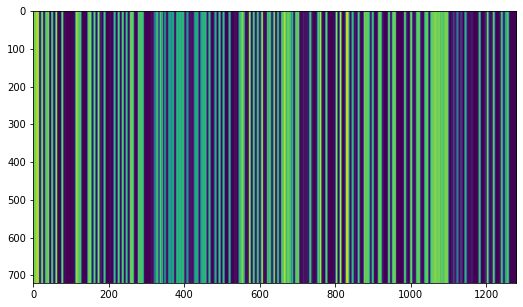

129


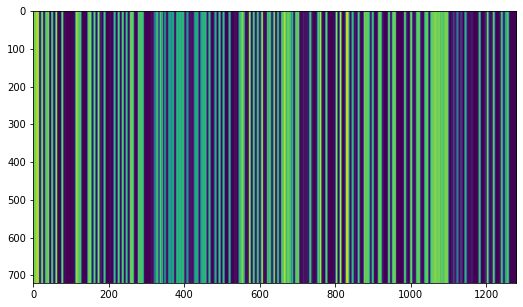

130


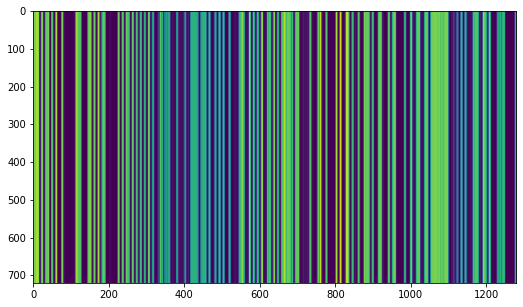

131


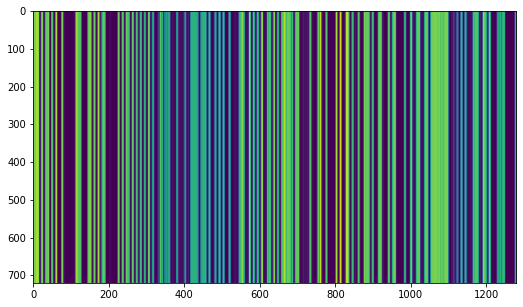

132


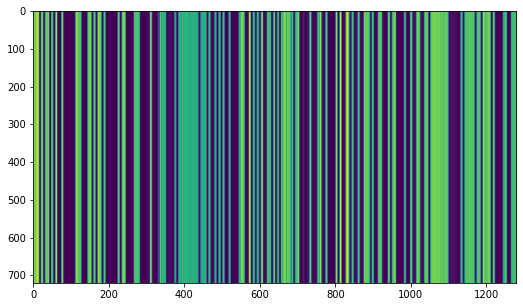

133


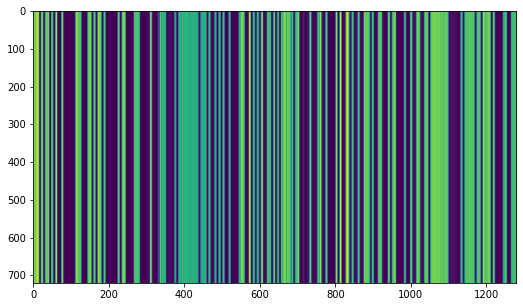

134


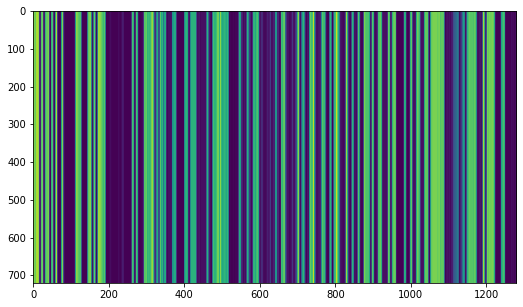

135


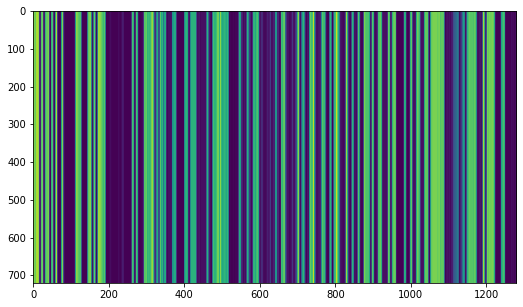

136


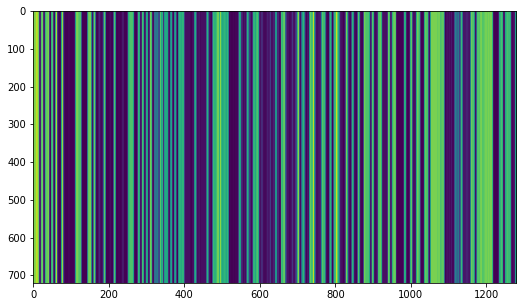

137


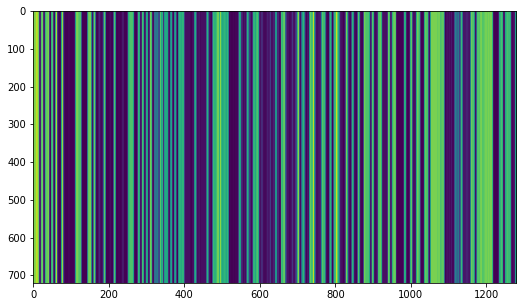

138


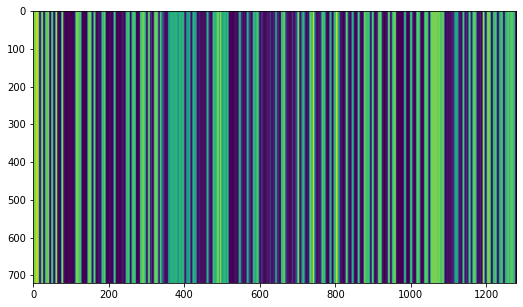

139


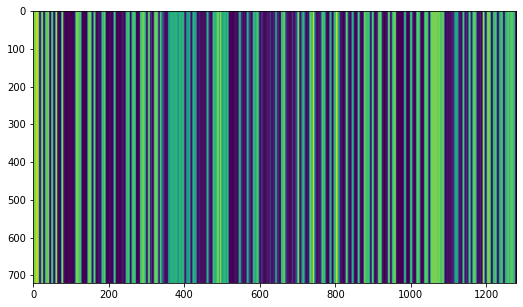

140


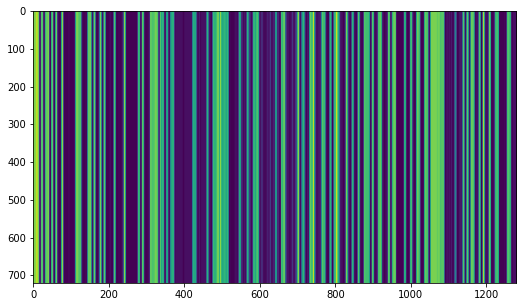

141


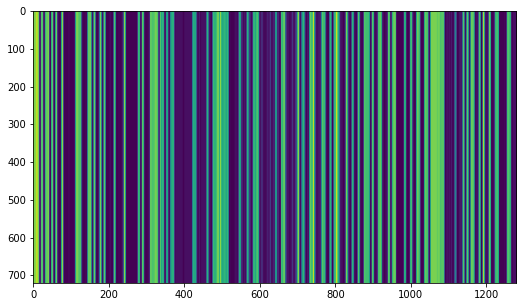

142


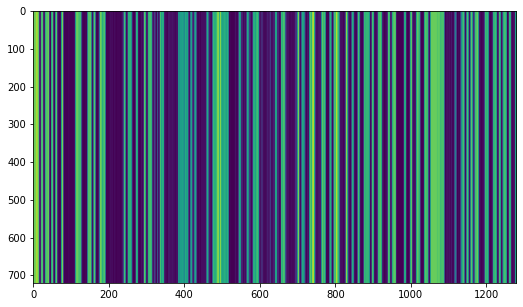

143


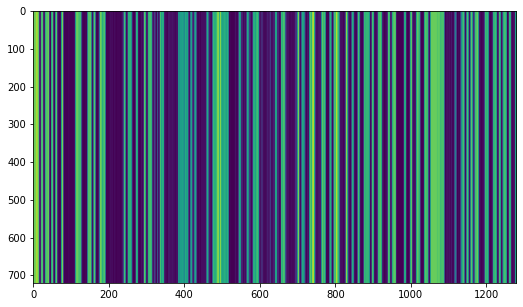

144


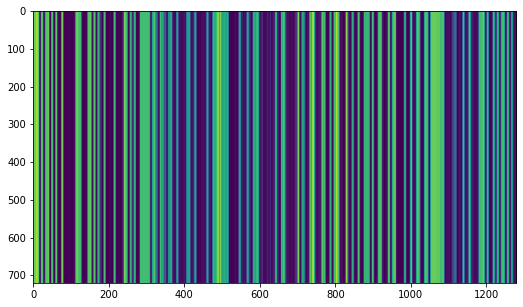

145


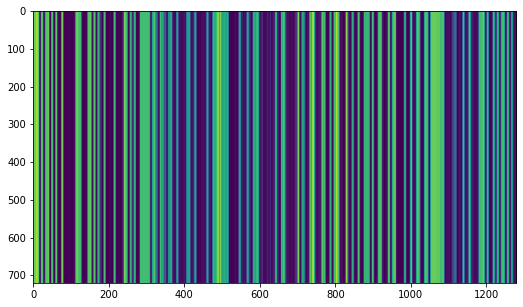

146


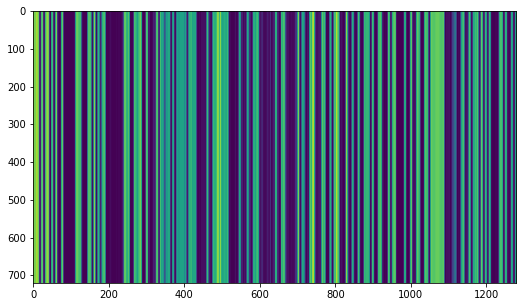

147


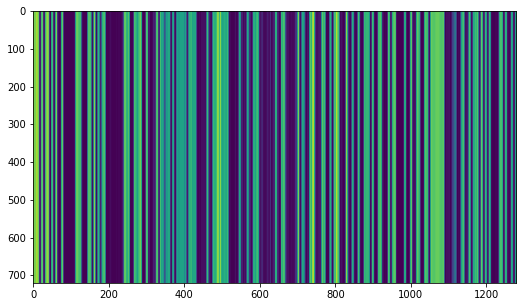

148


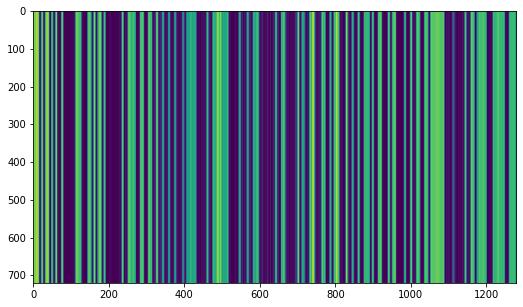

149


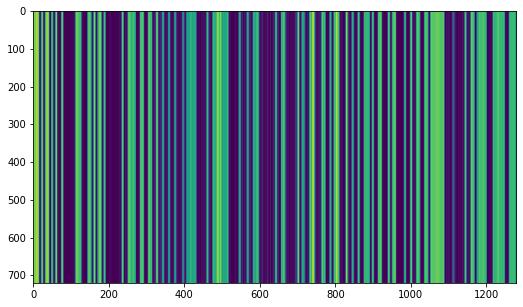

150


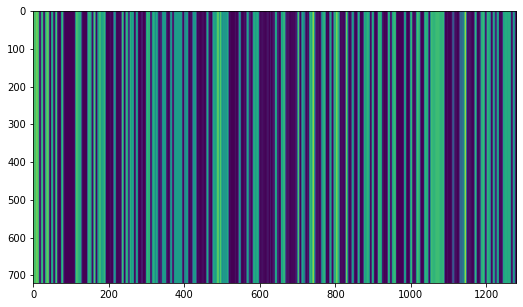

151


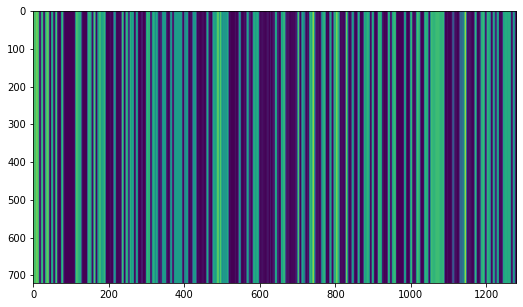

152


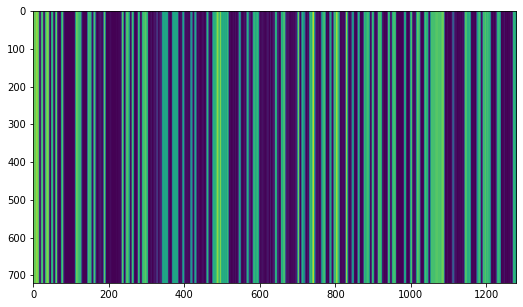

153


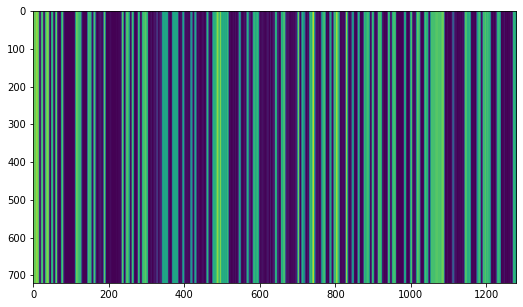

154


KeyboardInterrupt: 

In [27]:
cap = cv.VideoCapture('video.ts')

i = 0
while cap.isOpened() and i < 180:
    i+=1
    ret, frame = cap.read()
    if ret:
        # drop all but the first component of YCR_CB colorspace to only keep luma
        first_row_luma = cv.cvtColor(frame, cv.COLOR_BGR2YCR_CB)[0, :, 0][None]
        # 30 bytes of data

        plt.rcParams["figure.figsize"] = (30,5)

        imshow_luma = np.repeat(first_row_luma, height, axis=0)
        
        print(i)
        plt.imshow(imshow_luma)
        plt.show()

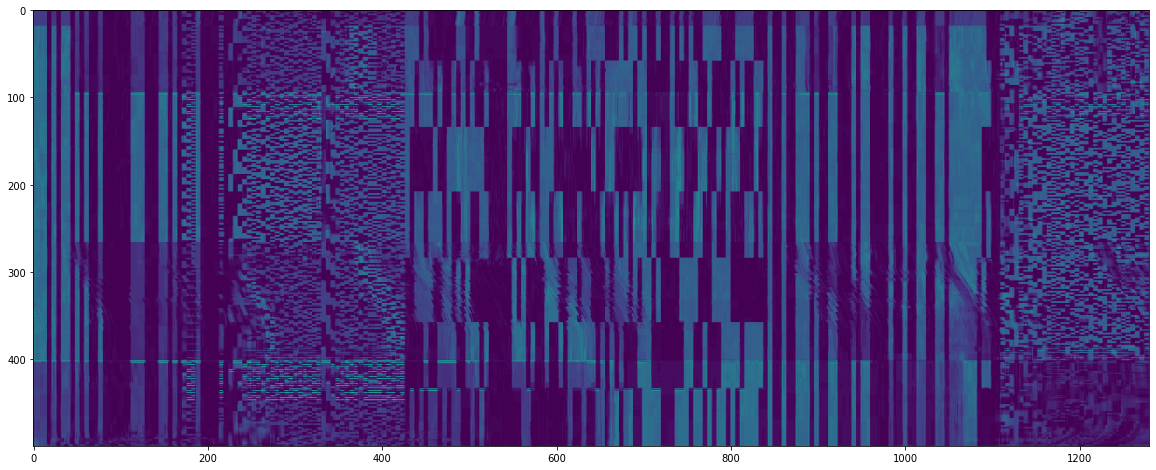

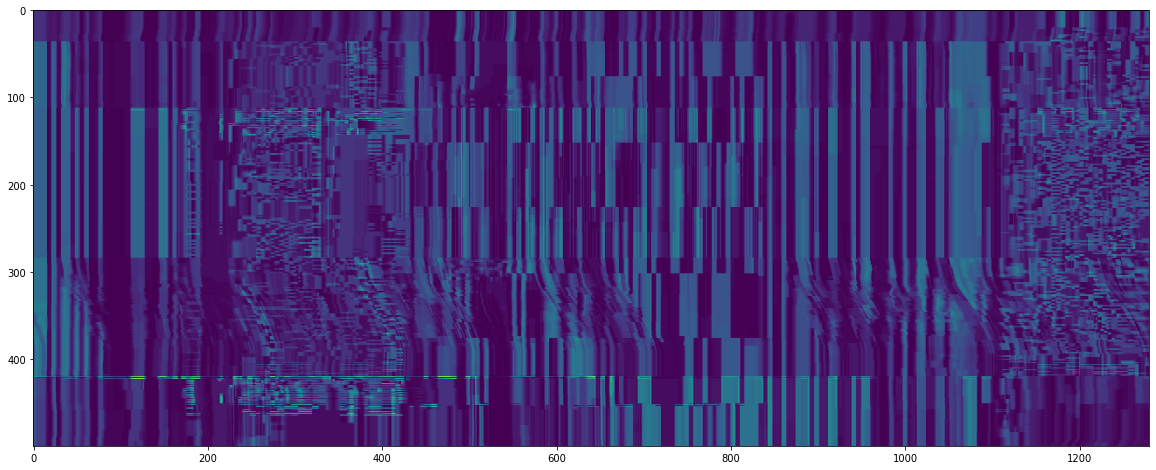

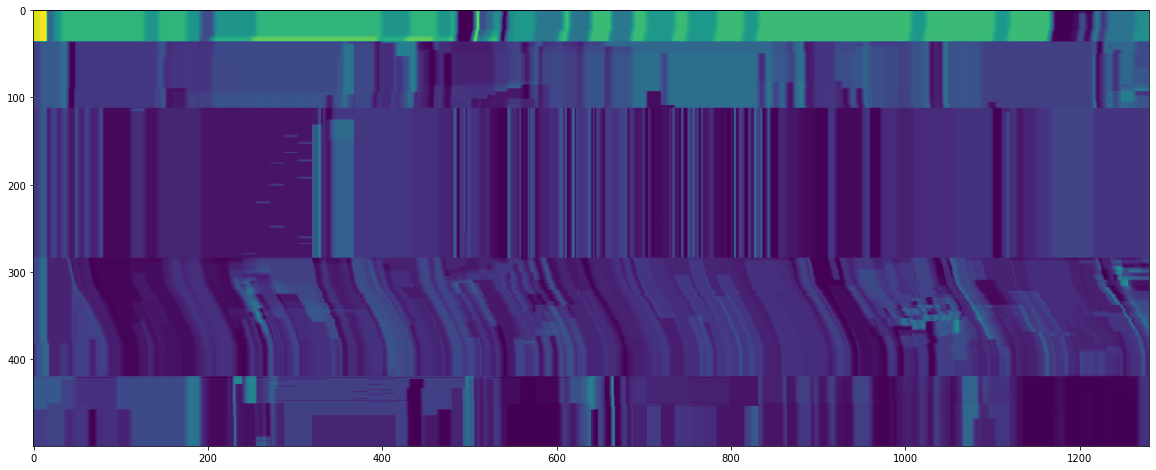

In [ ]:
# 50 frames per second
max_time = 10 * 50

mat = np.zeros((max_time, width, 1))

for filename in ["video.ts", "out.mp4", "out_low_br.mp4"]:
    cap = cv.VideoCapture(filename)

    i = 0
    while cap.isOpened() and i < max_time - 1:
        i+=1
        ret, frame = cap.read()
        if ret:
            # drop all but the first component of YCR_CB colorspace to only keep luma
            first_row_luma = cv.cvtColor(frame, cv.COLOR_BGR2YCR_CB)[0, :, 0][None]


            mat[i, :, 0] = first_row_luma[0, :]

    plt.rcParams["figure.figsize"] = (20, 10)
    plt.imshow(mat)
    plt.show()

In [28]:
from bitarray import bitarray
import bitarray.util as bit_util

In [29]:
max_time = 100 * 50

mat = np.zeros((max_time, width, 1))

bitarray_array = np.zeros(max_time, dtype=bitarray)
cap = cv.VideoCapture('video.ts')

i = 0
while cap.isOpened() and i < max_time:
    
    ret, frame = cap.read()
    if ret:
        # drop all but the first component of YCR_CB colorspace to only keep luma
        first_row_luma = cv.cvtColor(frame, cv.COLOR_BGR2YCR_CB)[0, :, 0][None]
        # 30 bytes of data
        resized = cv.resize(first_row_luma, (30 * 8, 1), interpolation=cv.INTER_LINEAR)

        mat[i, :, 0] = first_row_luma[0, :]
        threshold = 3
        bits = bitarray()
        bits.frombytes(np.packbits(resized > threshold).tobytes())
        bitarray_array[i] = bits
    i+=1

Note: early error correction. Sometimes the run_in_pattern is fb52, eb54, etc. basically one wrong bit away form eb52. we could then adjust the threshold till the pattern is correct

In [30]:
#see Table 5.2 A/336
def disassemble_bitstream_into_components(bits:bitarray) -> dict[str: bitarray]:
    wm_message = {}
    wm_message["run_in_pattern"] = bits[:16]
    wm_message["id"] = bits[16:24]
    wm_message["block_length"] = bits[24:32]
    wm_message_remaining_bytes = bit_util.ba2int(wm_message["block_length"])
    wm_message_remaining_bytes -= 4 #crc_32
    wm_message["version"] = bits[32:36]
    wm_message_bytes_start = 40
    if (wm_message["id"] & bitarray('10000000')) == 0:
        wm_message["fragment_number"] = bits[36:38]
        wm_message["last_fragment"] = bits[38:40]
        wm_message_remaining_bytes -= 1
    else:
        wm_message["reserved"] = bits[36:40]
        wm_message["fragment_number"] = bits[40:48]
        wm_message["last_fragment"] = bits[48:56]
        wm_message_remaining_bytes -= 3
        wm_message_bytes_start = 56
    if (wm_message["fragment_number"] == wm_message["last_fragment"] and wm_message["fragment_number"] != 0):
        wm_message_remaining_bytes -= 4 #message_crc_32
    wm_message_bytes_end = wm_message_bytes_start + (wm_message_remaining_bytes * 8)
    wm_message["bytes"] = bits[wm_message_bytes_start: wm_message_bytes_end]
    if (wm_message["fragment_number"] == wm_message["last_fragment"] and wm_message["fragment_number"] != 0):
        wm_message["message_crc_32"] = bits[wm_message_bytes_end: wm_message_bytes_end + 32]
        wm_message["crc_32"] = bits[wm_message_bytes_end + 32: wm_message_bytes_end + 64]
    else:
        wm_message["crc_32"] = bits[wm_message_bytes_end: wm_message_bytes_end + 32] 
    wm_message["entire_block"] = bits[16:wm_message_bytes_end]
    return wm_message

In [37]:
disassembled_message = disassemble_bitstream_into_components(bitarray_array[0])
print(disassembled_message)
print(type(bitarray_array[0]))


{'run_in_pattern': bitarray('1110101101010010'), 'id': bitarray('00000111'), 'block_length': bitarray('00011010'), 'version': bitarray('1001'), 'reserved': bitarray('0000'), 'fragment_number': bitarray('10001010'), 'last_fragment': bitarray('11010000'), 'bytes': bitarray('11011100110010111101100111101000000110010000001100000100100010011110001011010010010101001111000111100010010011101001100010110000100100110011011111111000'), 'crc_32': bitarray('01010101110011000111100110001101'), 'entire_block': bitarray('000001110001101010010000100010101101000011011100110010111101100111101000000110010000001100000100100010011110001011010010010101001111000111100010010011101001100010110000100100110011011111111000')}
<class 'bitarray.bitarray'>


In [32]:
# counting how many how many times the wm_message_version changes
old_version = None
version_count = 0
for b in bitarray_array:
    disassembled_message = disassemble_bitstream_into_components(b)
    version = disassembled_message["version"]
    if version != old_version:
        old_version = version
        version_count += 1
print(version_count / len(bitarray_array)) 

0.4768


In [33]:
run_in_pattern = bit_util.hex2ba('eb52')
correct_run_in_pattern_count = 0
for b in bitarray_array:
    disassembled_message = disassemble_bitstream_into_components(b)
    if run_in_pattern == disassembled_message["run_in_pattern"]:
        correct_run_in_pattern_count += 1
print(correct_run_in_pattern_count / len(bitarray_array)) 

0.862


In [34]:
import zlib

In [35]:
disassembled_message = disassemble_bitstream_into_components(bitarray_array[0])
print(bit_util.ba2int(disassembled_message["crc_32"]))
print(zlib.crc32(disassembled_message["entire_block"]))


1439463821
1439463821


In [36]:

for b in bitarray_array:
    disassembled_message = disassemble_bitstream_into_components(b)
